<a href="https://colab.research.google.com/github/costinhas/puc-rio-data-analysis/blob/main/MVP_Analise_de_dados_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Informações sobre o notebook

**Autor:**

Carlos Eduardo Azevedo Costinhas da Silva

<br>

**Data de criação:**

28-Novembro-2023

<br>

**Descrição:**

Relatório criado como projeto final da sprint de Análise de Dados e Boas Práticas, do curso de Pós-Graduação em Ciência de Dados e Analytics da PUC-RIO.

Para manipulação e visualização dos dados foi utilizada a linguagem Python e as bibliotecas Pandas, Numpy, Matplotlib e Seaborn. Para operações auxiliares, foram utilizadas as bibliotecas Missingno, Wordcloud e Counter.

<br>

**Objetivo:**

Realização de uma análise exploratória em um dataset público com filmes e séries do catálogo da plataforma de streaming Netflix. O dataset foi extraído da plataforma Kaggle e está disponível no link https://www.kaggle.com/datasets/shivamb/netflix-shows/data.

<br><br><br>

# 2. Definição do problema

## 2.1. Contexto

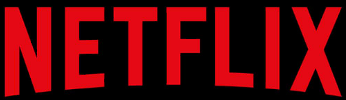

**Netflix** é uma das plataformas de streaming mais populares no mundo. Lançada em 2010, está disponível em mais de 190 países, possui mais de 230 milhões de assinantes globalmente e um catálogo de conteúdo muito extenso, com centenas de horas de programação original.







## 2.2. Problema
Apesar de possuir um catálogo extenso, a plataforma não disponibiliza informações detalhadas sobre seu conteúdo ao público que ainda não é assinante e deseja escolher qual é a plataforma de streaming mais adequada para contratar.

A plataforma possui uma página dedicada a informações adicionais sobre seu conteúdo (https://www.netflix.com/tudum), mas não há uma forma de filtrar ou listar conteúdos por seus atributos (tipo, gênero, data de lançamento etc).

## 2.3. Hipóteses
Com base na experiência de uso desta e de outras plataformas de streaming, é possível listar algumas hipóteses sobre o catálogo global da Netflix, antes de realizar a análise exploratória dos dados:

1. É provável que a quantidade de filmes disponíveis no catálogo seja maior do que a quantidade de séries;

2. Por ser uma empresa americana, é provável que a maioria dos conteúdos disponíveis no catálogo sejam produzidos nos Estados Unidos;

3. A plataforma não deve oferecer uma grande variedade de conteúdos mais antigos (com mais de 30 ou 40 anos), priorizando produções mais recentes.

## 2.4. Outras questões que podem ser respondidas
Além da validação das hipóteses citadas, existem outras questões que podem ser respondidas com base em uma análise detalhada deste catálogo:

1. A plataforma está expandindo seu catálogo ao longo dos anos, oferecendo novidades constantes para seus assinantes? Caso positivo, está incluindo mais filmes ou séries?

2. Quais são os países que mais produzem conteúdo?

3. Quais são os principais gêneros de conteúdo?

4. Qual é a proporção de conteúdos voltados para o público infantil, adolescente e adulto?

Estas são perguntas podem ser respondidas com estatísticas descritivas e visualizações de dados em uma análise exploratória, sem necessariamente envolver Machine Learning.

No entanto, se fosse utilizado Machine Learning, seria interessante buscar padrões nos dados sem necessariamente ter uma variável alvo ou resultado previsto (por exemplo, agrupar filmes semelhantes com base em suas características), sendo este um problema de aprendizado não supervisionado, de clusterização.

## 2.5. Detalhes do dataset selecionado
O dataset foi extraído da plataforma Kaggle no dia 28/11/2023 e está disponível no link https://www.kaggle.com/datasets/shivamb/netflix-shows/data.

Como a plataforma requer login para acessar o conteúdo, uma cópia do dataset foi feita para este [repositório do GitHub](https://github.com/costinhas/puc-rio-data-analysis/tree/main/source) para facilitar a carga neste notebook.

O dataset possui os seguintes atributos, todos mantidos com seus nomes originais em inglês para manter a identidade do dataset:

* **show_id** - Identificador único para cada conteúdo do catálogo
* **type** - Tipo do conteúdo (filme ou série)
* **title** - Título do conteúdo
* **director** - Diretor do conteúdo
* **cast** - Atores envolvidos no conteúdo
* **country** - País onde o conteúdo foi produzido
* **date_added** - Data em que o conteúdo foi adicionado ao Netflix
* **release_year** - Ano de lançamento do conteúdo
* **rating** - Classificação de TV do conteúdo
* **duration** - Duração total do conteúdo- em minutos ou número de temporadas
  * Durante as etapas de transformação, este atributo foi renomeado para **duration_minutes**

* **listed_in** - Gêneros do conteúdo. Um ou mais gêneros possíveis, separados por vírgula
* **description** - Descrição do conteúdo





Novos atributos foram criados durante as etapas de análise e pré-processamento e, seguindo o mesmo padrão dos demais, também foram criados com termos em inglês:

* **seasons** - Quantidade de temporadas que o conteúdo possui, caso possua

* **target_ages** - Faixa etária adequada para o conteúdo, de acordo como o código da classificação (atributo **rating**)

* **month_added** - Mês em que o conteúdo foi disponibilizado na plataforma

* **year_added** - Ano em que o conteúdo foi disponibilizado na plataforma

* **release_gap** - Tempo (em anos) para que o conteúdo tenha sido disponibilizado na plataforma após seu lançamento

<br><br><br>

# 3. Carga dos dados

Iniciaremos o projeto com a importação dos pacotes necessários. Utilizaremos a linguagem Python e as bibliotecas Pandas, Numpy, Matplotlib e Seaborn. Para operações auxiliares, serão utilizadas as bibliotecas Missingno, Wordcloud e Counter:

In [ ]:
# Configuração para não exibir os alertas
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import missingno as ms # para tratamento de valores nulos
from wordcloud import WordCloud # para construção da nuvem de palavras (word cloud)
from collections import Counter # para contagem de palavras
import seaborn as sns
from matplotlib import cm

Será criado um dicionário com nome dos meses do ano para facilitar a visão de alguns gráficos:

In [ ]:
# Dicionário para mapear números de meses para nomes de meses
meses_dict = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

Realizando a carga do dataset da Netflix, que foi salvo em um repositório do GitHub para facilitar a extração:

In [ ]:
# URL do dataset que será carregado
url_dados = 'https://github.com/costinhas/puc-rio-data-analysis/raw/main/source/netflix_movies_shows.zip'

# Carga do dataset através da URL informada. O caracter separador dos campos é a vírgula.
# Como os labels de cada atributo já estão listados na primeira linha, não será necessário defini-los explicitamente
netflix = pd.read_csv(url_dados, delimiter=',')

<br><br><br>

# 4. Análise inicial dos dados

Vamos começar analisando as dimensões do dataset:

In [ ]:
# Dimensões do dataset
netflix.shape

(8807, 12)

O dataset possui 8807 instâncias (linhas) e 12 atributos (colunas). Analisando os tipos de cada atributo:

In [ ]:
# Visão geral do dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


O único atributo com valor numérico é **release_year**. Todos os demais são atributos de texto.

Visualizando algumas amostras dos valores contidos no dataset, para validar estes tipos de dados:

In [ ]:
# Mostra as 5 primeiras linhas do dataset
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# ... e as 5 últimas linhas do dataset
netflix.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


Analisando estas amostras selecionadas do início e fim do dataset, já é possível identificar algumas características interessantes sobre os dados:

* O atributo **date_added** está armazenado em forma de texto (ex: "September 25, 2021") e precisará de um tratamento específico para permitir análises mais detalhadas;

* O atributo **release_year** é o único atributo com valor exclusivamente numérico e que permitirá analisar um resumo estatístico;

* O atributo **duration** está sendo utilizado para armazenar dois tipos diferentes de informação: a duração em minutos ou a quantidade de temporadas (seasons). Será necessário um tratamento específico neste atributo para derivá-lo em dois específicos.

* O atributo **listed_in** pode listar diversos valores diferentes concatenados. Será necessário levar isto em consideração no momento de realizar alguma análise utilizando este atributo.

In [ ]:
#Contagem de cada atributo do dataset
netflix.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

É possível identificar que alguns atributos possuem campos nulos, pois nem todos contém o total de registros (8807). Por exemplo: director, cast ou country.

O tratamento destes valores nulos será feito na etapa de Pré-Processamento de dados.

Verificando quais são os tipos de conteúdo disponíveis no catálogo, suas respectivas quantidades e proporções em relação ao total:

In [ ]:
# Total de linhas do dataset
total_linhas = len(netflix)

# Para cada valor existente na coluna type, exibir a quantidade e o percentual em relação ao total de linhas
for valor, quantidade in netflix['type'].value_counts().items():
  percentual = (quantidade / total_linhas) * 100
  print(f"{valor} - {quantidade} registros ({percentual:.2f}% do total)")

Movie - 6131 registros (69.62% do total)
TV Show - 2676 registros (30.38% do total)


É possível verificar que o catálogo possui uma quantidade significativamente maior de filmes do que séries.

<br><br><br>

# 5. Pré-processamento de dados

## 5.1. Tratamento dos valores nulos

Podemos investigar em detalhes quais atributos possuem registros nulos e seu percentual em relação ao total de registros do dataset:

In [ ]:
# Total de linhas do dataset
total_linhas = len(netflix)

# Listando as colunas que possuem registros nulos e sua respectiva quantidade
for coluna in netflix.columns:
    total_nulos = netflix[coluna].isnull().sum()
    percentual_nulos = (total_nulos / total_linhas) * 100

    if total_nulos > 0 :
      print(f"{coluna} = {total_nulos} registros nulos ({percentual_nulos:.2f}% do total)")

# Um resultado similar poderia ser obtido com apenas uma linha de código: dataset.isnull().sum()
# Porém, o trecho de código utilizado acima permitiu exibir apenas os atributos que possuem nulos de uma forma mais descritiva.

director = 2634 registros nulos (29.91% do total)
cast = 825 registros nulos (9.37% do total)
country = 831 registros nulos (9.44% do total)
date_added = 10 registros nulos (0.11% do total)
rating = 4 registros nulos (0.05% do total)
duration = 3 registros nulos (0.03% do total)


Para facilitar a visualização dos campos que possuem mais registros nulos, será usada a biblioteca missingno, com a exibição a seguir:

<Axes: >

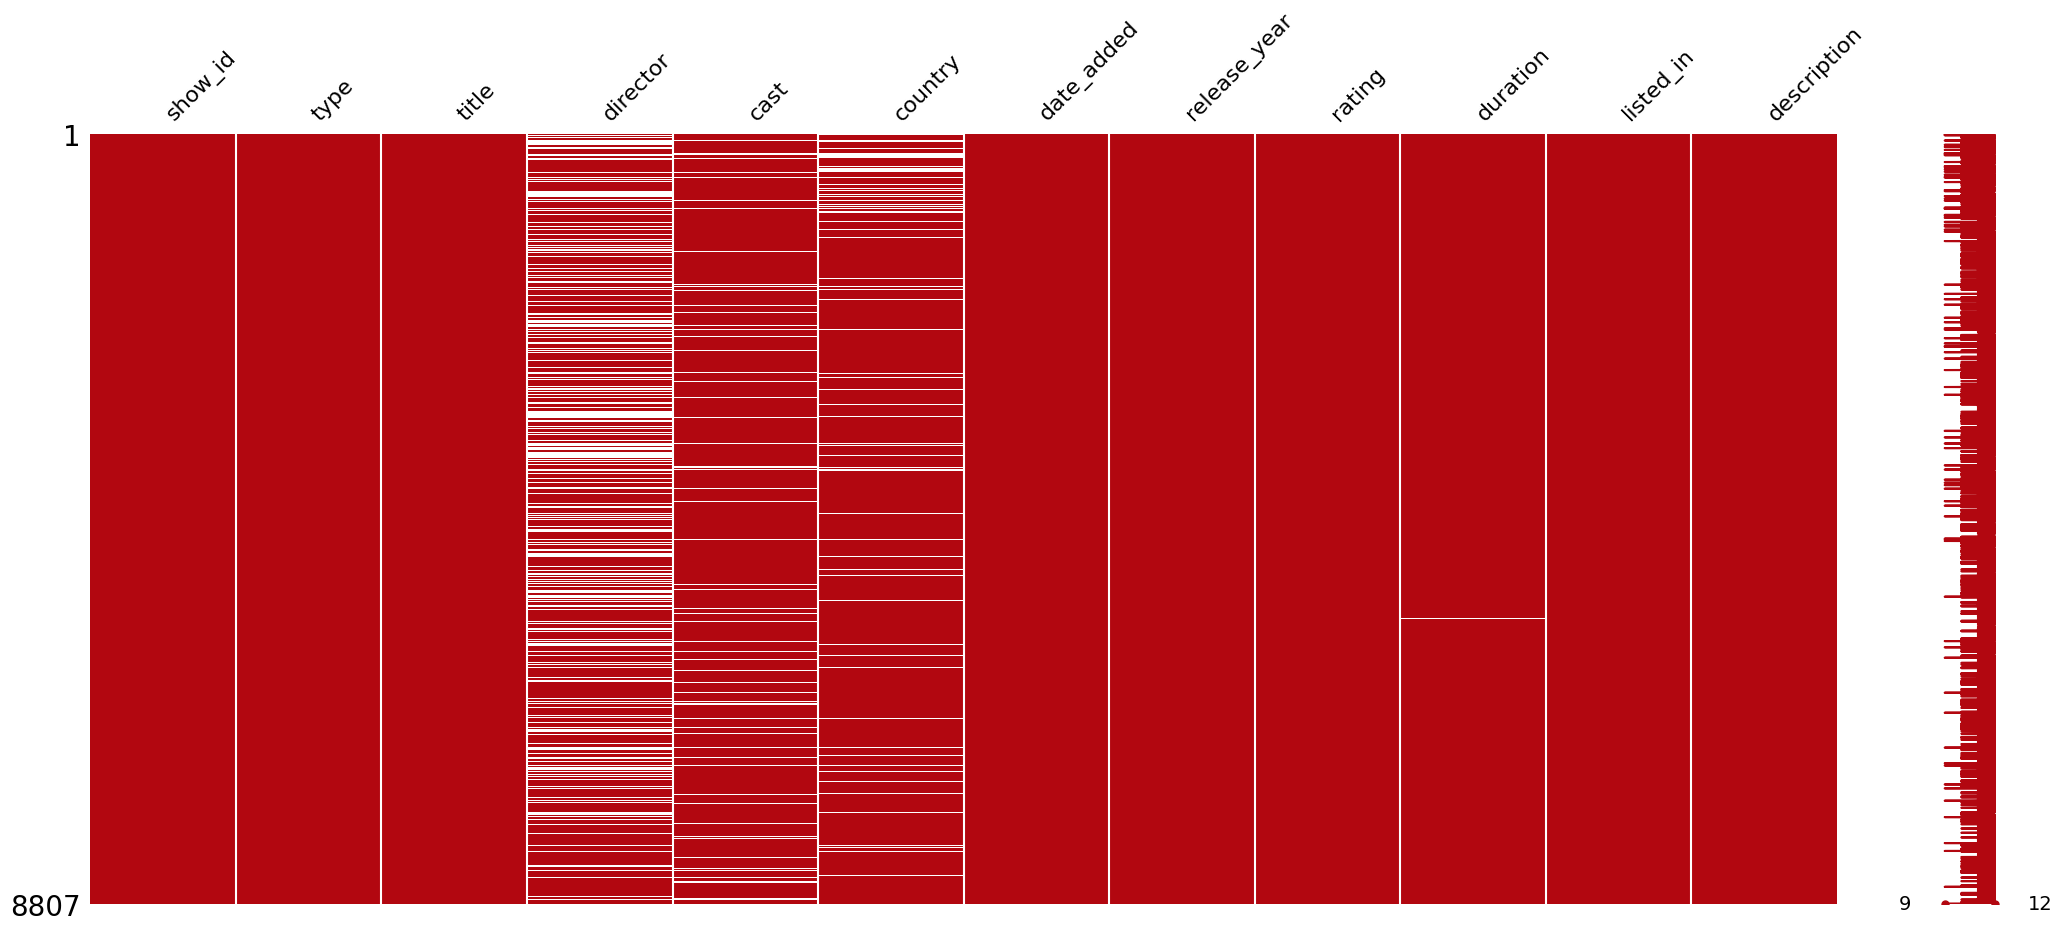

In [ ]:
# Visão geral dos valores nulos em cada atributo do dataset
ms.matrix(netflix, color=(178/255, 7/255, 16/255))

<br><br><br>

### 5.1.1. Director

Iniciando pelo atributo '**director**' que possui a maior quantidade de registros nulos (2634 registros, sendo 29.91% do total).

Vamos analisar os totais por tipo de conteúdo que não possuem diretor informado:







In [ ]:
# Filtrando os registros com 'director' nulo
director_nulos = netflix[netflix['director'].isnull()]

# Agrupando por 'type' e calculando o total de registros nulos de cada grupo
qtd_director_nulos_por_type = director_nulos.groupby('type').size()

# Calculando o percentual em relação à quantidade total de registros do dataset
total_linhas = len(netflix)
percentual_linhas = (qtd_director_nulos_por_type / total_linhas) * 100

# Exibe os totais e percentuais
director_nulos_por_type = pd.DataFrame({
    'Registros sem diretor': qtd_director_nulos_por_type,
    '% em relação ao total': percentual_linhas.round(2)
})

print(director_nulos_por_type)

         Registros sem diretor  % em relação ao total
type                                                 
Movie                      188                   2.13
TV Show                   2446                  27.77


Ao exibir as quantidades por tipo de conteúdo, identificamos que apenas 188 filmes não possuem a informação de diretor preenchida (2% do total do catálogo), enquanto séries (TV Show) são a maioria dos registros sem diretor informado, com 2446 (28% do total do catálogo).

<br>

#### Séries

É comum que séries de TV tenham diversos diretores, em episódios e/ou temporadas diferentes. Como exemplo do primeiro item da lista, a série "Blood & Water":

In [ ]:
# Identificando a primeira série que não possui diretor informado:
netflix.loc[(netflix['director'].isnull()) & (netflix['type'] == "TV Show")].head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Ao consultar este item no IMDB (https://www.imdb.com/title/tt9839146/fullcredits/?ref_=tt_cl_sm), é possível validar que existem diferentes diretores para determinados episódios e temporadas:

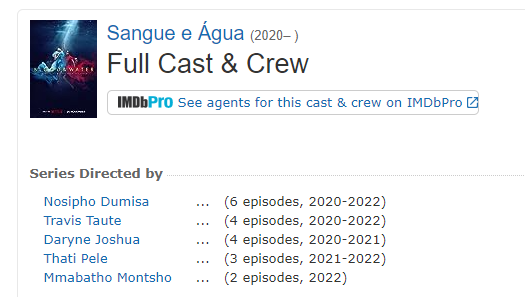

**Decisão:**

Em função da dificuldade para obter e consolidar uma lista adicional de diretores para as séries com esta informação ausente neste dataset, a decisão será manter estes campos sem informação, substituindo os valores nulos por "Não informado".

Além disso, não será realizada nenhuma análise sobre diretores de séries, tendo em vista esta variedade de direção por episódios.

In [ ]:
# Criando uma cópia do dataset original, que será utilizada para remoção dos valores nulos
netflixSemNulos = netflix.copy()

# Localizando os registros com type = 'TV Show' e substituindo os valores nulos do atributo director por 'Não informado'
netflixSemNulos.loc[(netflixSemNulos['type'] == 'TV Show') & (netflixSemNulos['director'].isnull()), 'director'] = 'Não informado'

# Comparando as duas versões...
# Antes do tratamento:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

O dataset original possui 2634 registros com atributo 'director' nulo.

In [ ]:
# Depois do tratamento:
netflixSemNulos.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

Após o tratamento, restam apenas os 188 filmes que possuem o atributo 'director' nulo.

In [ ]:
# Total de registros com type = 'TV Show' e director = 'Não informado':
netflixSemNulos[(netflixSemNulos['type'] == 'TV Show') & (netflixSemNulos['director'] == 'Não informado')].shape[0]

2446

E a confirmação acima, da quantidade de séries que já foram tratadas (2446).

<br>

#### Filmes

O cenário é diferente para Filmes, que não possuem várias temporadas ou episódios. Mesmo que o filme possua vários diretores, todos são relacionados ao filme por completo. Selecionando uma instância do dataset para validação:

In [ ]:
# Identificando o primeiro filme que não possui diretor informado:
netflix.loc[(netflix['director'].isnull()) & (netflix['type'] == "Movie")].head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
404,s405,Movie,9to5: The Story of a Movement,NaN,NaN,NaN,"July 22, 2021",2021,TV-MA,85 min,Documentaries,"In this documentary, female office workers in ..."


Ao consultar este filme no IMDB (https://www.imdb.com/title/tt11753730/), pode-se obter as informações sobre Diretores:

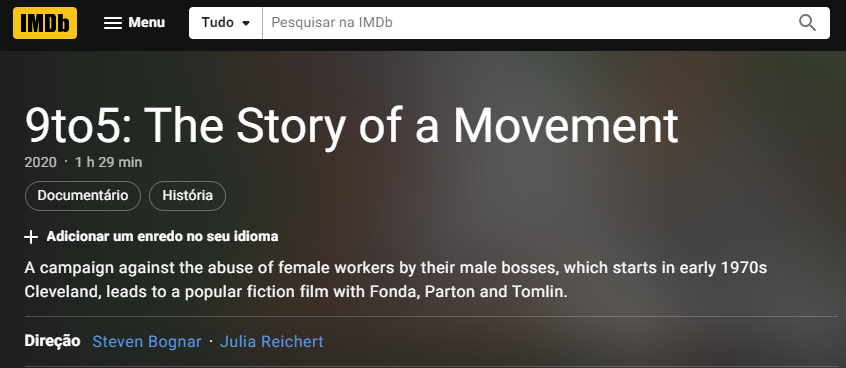

Uma opção válida para complementar estas informações pendentes seria importar dados do IMDB, disponíveis através de diferentes datasets (https://datasets.imdbws.com/), buscando o título e identificador no dataset **title.basics.tsv.gz** (aproximadamente 306MB e 10.3 milhões de registros) e em seguida buscando os diretores correspondentes no dataset **title.crew.tsv.gz**.

Porém, tendo em vista que o volume de filmes sem a informação de diretor preenchida representa apenas 2% do catálogo geral, os dados não serão adicionados no escopo deste MVP.

**Decisão:**

Os filmes que possuem o atributo 'director' nulo serão mantidos sem esta informação, tendo apenas os valores nulos substituídos por 'Não informado'.

Em uma análise de diretores por filmes, a minoria de filmes que não possui diretor informado (2% do total) será desconsiderada.

In [ ]:
# Localizando os registros com type = 'Movie' e substituindo os valores nulos do atributo director por 'Não informado'
netflixSemNulos.loc[(netflixSemNulos['type'] == 'Movie') & (netflixSemNulos['director'].isnull()), 'director'] = 'Não informado'

# Comparando as duas versões...
# Antes do tratamento:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Depois do tratamento:
netflixSemNulos.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [ ]:
# Total de registros com type = 'Movie' e director = 'Não informado':
netflixSemNulos[(netflixSemNulos['type'] == 'Movie') & (netflixSemNulos['director'] == 'Não informado')].shape[0]

188

E a confirmação acima, da quantidade de filmes que já foram tratados (188).

<br><br><br>


### 5.1.2. Cast e Country

Os próximos atributos a serem tratado são:
* 'cast', que possui 825 registros nulos (9.37% do total);
* 'country', que possui 831 registros nulos (9.44% do total).

Neste cenário também existe a possibilidade de buscar os dados restantes no dataset do IMDB. Porém, pelos mesmos motivos citados no tratamento do atributo 'director', não haverá busca externa de informações.

<br>

**Decisão:**

Os valores nulos nos atributos 'cast' e 'country' serão substituídos por 'Não informado' no escopo deste MVP.

As análises baseadas nas informações de elenco ou país de origem levarão em consideração estes valores não informados.

In [ ]:
# Localizando os registros que possuem valores nulos no atributo 'cast', e substituindo-os por 'Não informado'
netflixSemNulos.loc[(netflixSemNulos['cast'].isnull()), 'cast'] = 'Não informado'

In [ ]:
# Localizando os registros que possuem valores nulos no atributo 'country', e substituindo-os por 'Não informado'
netflixSemNulos.loc[(netflixSemNulos['country'].isnull()), 'country'] = 'Não informado'

In [ ]:
# Comparando as duas versões...
# Antes do tratamento:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

No dataset original existiam 825 registros com 'cast' nulo e 831 registros com 'country' nulos.

In [ ]:
# Depois do tratamento:
netflixSemNulos.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [ ]:
# Total de registros com cast = 'Não informado':
netflixSemNulos[(netflixSemNulos['cast'] == 'Não informado')].shape[0]

825

In [ ]:
# Total de registros com country = 'Não informado':
netflixSemNulos[(netflixSemNulos['country'] == 'Não informado')].shape[0]

831

E a confirmação acima, da quantidade de registros que já foram tratados (atributo 'cast' = 825; atributo 'country' = 831).

<br><br><br>

### 5.1.3. Date_Added

Apenas 10 registros possuem o campo 'date_added' nulos (0.11% do total).

Identificando estes registros:

In [ ]:
# Identificando as instâncias que não possuem o atributo 'date_added' informado:
netflix.loc[(netflix['date_added'].isnull())].head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


<br>

Todas as instâncias possuem informações no atributo '**release_year**', que poderia ser utilizado como referência para popular os valores nulos em '**date_added**'. No entanto, existem conteúdos que foram lançados em anos anteriores ao de inauguração da plataforma (2010). Se aplicássemos esta regra, poderíamos indicar que um conteúdo de 2003 foi disponibilizado na plaforma em 2003, 7 anos antes do Netflix ser lançado (2010).

A regra adotada será baseada no valor mais comum (moda) do atributo **date_added**.

<br>

**Decisão:**

Identificar o ano mais comum de disponibilização de conteúdos na plataforma e adotar este ano como padrão para os registros com valor nulo, inserindo como 31 de dezembro deste ano.

In [ ]:
# Armazenando os IDs dos registros com 'date_added' nulo.
# Estes IDs serão utilizados posteriormente para checagem após atualização dos valores
ids_date_nulos = netflixSemNulos.loc[netflixSemNulos['date_added'].isnull(), 'show_id']

In [ ]:
# Localizando os registros que possuem valores nulos no atributo 'date_added' do dataframe Netflix
# que está sendo tratado (sem nulos), e substituindo-os por 31 de dezembro do ano em que foram produzidos (release_year)

# Criando um novo dataframe apenas com um "link" para os registros que possuem 'date_added' nulo
date_added_nulos = netflixSemNulos[netflixSemNulos['date_added'].isnull()]

# Calculando o ano mais comum de disponibilização de conteúdos na plataforma (date_added)
ano_popular = int(pd.to_datetime(netflixSemNulos['date_added']).dt.year.mode()[0])

# Substituindo os valores nulos no campo 'date_added' por 31 de dezembro do ano em que foram produzidos (release_year)
netflixSemNulos.loc[date_added_nulos.index, 'date_added'] = "December 31, " + str(ano_popular)

# Exibindo os registros com os IDs salvos anteriormente, para confirmar que foram alterados:
netflixSemNulos[netflixSemNulos['show_id'].isin(ids_date_nulos)].head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Não informado,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,"December 31, 2019",2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Não informado,Anthony Bourdain,United States,"December 31, 2019",2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Não informado,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,"December 31, 2019",2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Não informado,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,"December 31, 2019",2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Não informado,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,"December 31, 2019",2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Não informado,Igor Dmitriev,Não informado,"December 31, 2019",2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Não informado,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,"December 31, 2019",2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Não informado,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,"December 31, 2019",2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Não informado,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,"December 31, 2019",2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Não informado,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,"December 31, 2019",2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
# Comparando as duas versões...
# Antes do tratamento:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

No dataset original existiam 10 registros com 'date_added' nulo.



In [ ]:
# Depois do tratamento:
netflixSemNulos.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

Não existem mais registros com 'date_added' nulo.

<br><br><br>




### 5.1.4. Duration

Apenas 3 registros possuem o campo 'rating' nulos (0.03% do total).

Identificando estes registros:

In [ ]:
# Identificando as instâncias que não possuem o atributo 'duration' informado:
netflix.loc[(netflix['duration'].isnull())].head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Nesta etapa identificamos não só os registros com valor de 'duration' nulo, mas um cenário não identificado anteriormente:

Os valores do atributo 'rating' são, na verdade, valores que deveriam estar no atributo 'duration'.

<br>

**Decisão:**

Serão realizadas duas transformações. A primeira é transpor os valores que estão incorretamente no atributo 'rating' para o 'duration' nestes 3 registros identificados, solucionando os valores nulos.

A segunda transformação será realizada no tratamento dos valores nulos do atributo 'rating', buscando quais são os demais registros que posssuem valores indevidos como estes que acabamos de identificar.

In [ ]:
# Armazenando os IDs dos registros com 'duration' nulo
ids_duration_nulos = netflixSemNulos.loc[netflixSemNulos['duration'].isnull(), 'show_id']

# Localizando os registros que possuem valores nulos no atributo 'duration' do dataframe Netflix
# que está sendo tratado (sem nulos), e substituindo-os pelo valor do atributo 'rating'

# Criando um novo dataframe apenas com os registros que possuem 'duration' nulo
duration_nulos = netflixSemNulos[netflixSemNulos['duration'].isnull()]

# Substituindo os valores nulos no campo 'duration' por 31 de dezembro do ano em que foram produzidos (release_year)
netflixSemNulos.loc[duration_nulos.index, 'duration'] = duration_nulos['rating'].astype(str)

# Exibindo os registros com os IDs salvos anteriormente, para confirmar que foram alterados:
netflixSemNulos[netflixSemNulos['show_id'].isin(ids_duration_nulos)].head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# Comparando as duas versões...
# Antes do tratamento:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

No dataset original existiam 3 registros com 'duration' nulo.

In [ ]:
# Depois do tratamento:
netflixSemNulos.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        0
listed_in       0
description     0
dtype: int64

Não existem mais registros com 'duration' nulo.

<br><br><br>

### 5.1.5. Rating

Apenas 4 registros possuem o campo 'rating' nulos (0.05% do total). Além destes, no tratamento do atributo anterior (duration) foram identificados registros com valores não esperados neste campo 'rating'.

In [ ]:
# Identificando registros fora do padrão:
netflixSemNulos.groupby('rating').size()

rating
66 min         1
74 min         1
84 min         1
G             41
NC-17          3
NR            80
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3207
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
dtype: int64

Apenas os 3 primeiros valores exibidos estão fora do padrão, pois são referentes à duração.

Buscando agora os registros que possuem 'rating' com valor nulo:

In [ ]:
# Identificando as instâncias que não possuem o atributo 'rating' informado:
netflixSemNulos.loc[(netflixSemNulos['rating'].isnull())].head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Não informado,"Oprah Winfrey, Ava DuVernay",Não informado,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Não informado,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Não informado,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


**Decisão:**

Atualizar os registros com atributo 'rating' nulo, ou fora do padrão (contendo o trecho " min") com o valor mais frequente (moda) para este tipo de conteúdo.

Verificando as modas para cada tipo de conteúdo:

In [ ]:
netflixSemNulos[netflixSemNulos['type'] == 'Movie']['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [ ]:
netflixSemNulos[netflixSemNulos['type'] == 'TV Show']['rating'].mode()

0    TV-MA
Name: rating, dtype: object

Nota-se que para ambos os tipos de conteúdo do catálogo, a classificação (rating) mais comum é "TV-MA". Este será o valor adotado para os campos 'rating' dos registros que devem ser corrigidos:

In [ ]:
# Calculando o valor da moda do campo 'rating'
moda_rating = netflixSemNulos['rating'].mode()[0]

# Localizando os registros que possuem valores nulos no atributo 'rating' e
# substituindo-os pelo valor da moda:
netflixSemNulos.loc[(netflixSemNulos['rating'].isnull()), 'rating'] = moda_rating

In [ ]:
# Localizando os registros que possuem valores incorretos no campo 'rating' (que possuam o trecho " min")
registros_incorretos = netflixSemNulos[netflixSemNulos['rating'].str.contains(" min", na=False)]

# Substituindo-os pelo valor da moda:
netflixSemNulos.loc[registros_incorretos.index, 'rating'] = moda_rating

In [ ]:
# Comparando as duas versões...
# Antes do tratamento:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

No dataset original existiam 4 registros com 'rating' nulo.

In [ ]:
# Depois do tratamento:
netflixSemNulos.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Não existem mais registros com 'rating' nulo.

Além disso, o atributo 'rating' agora não possui mais valores fora do padrão esperado:


In [ ]:
netflixSemNulos.groupby('rating').size()

rating
G             41
NC-17          3
NR            80
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3214
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
dtype: int64

<br><br><br>

## 5.2. Validação após tratamento dos valores nulos

Antes dos tratamentos:

<Axes: >

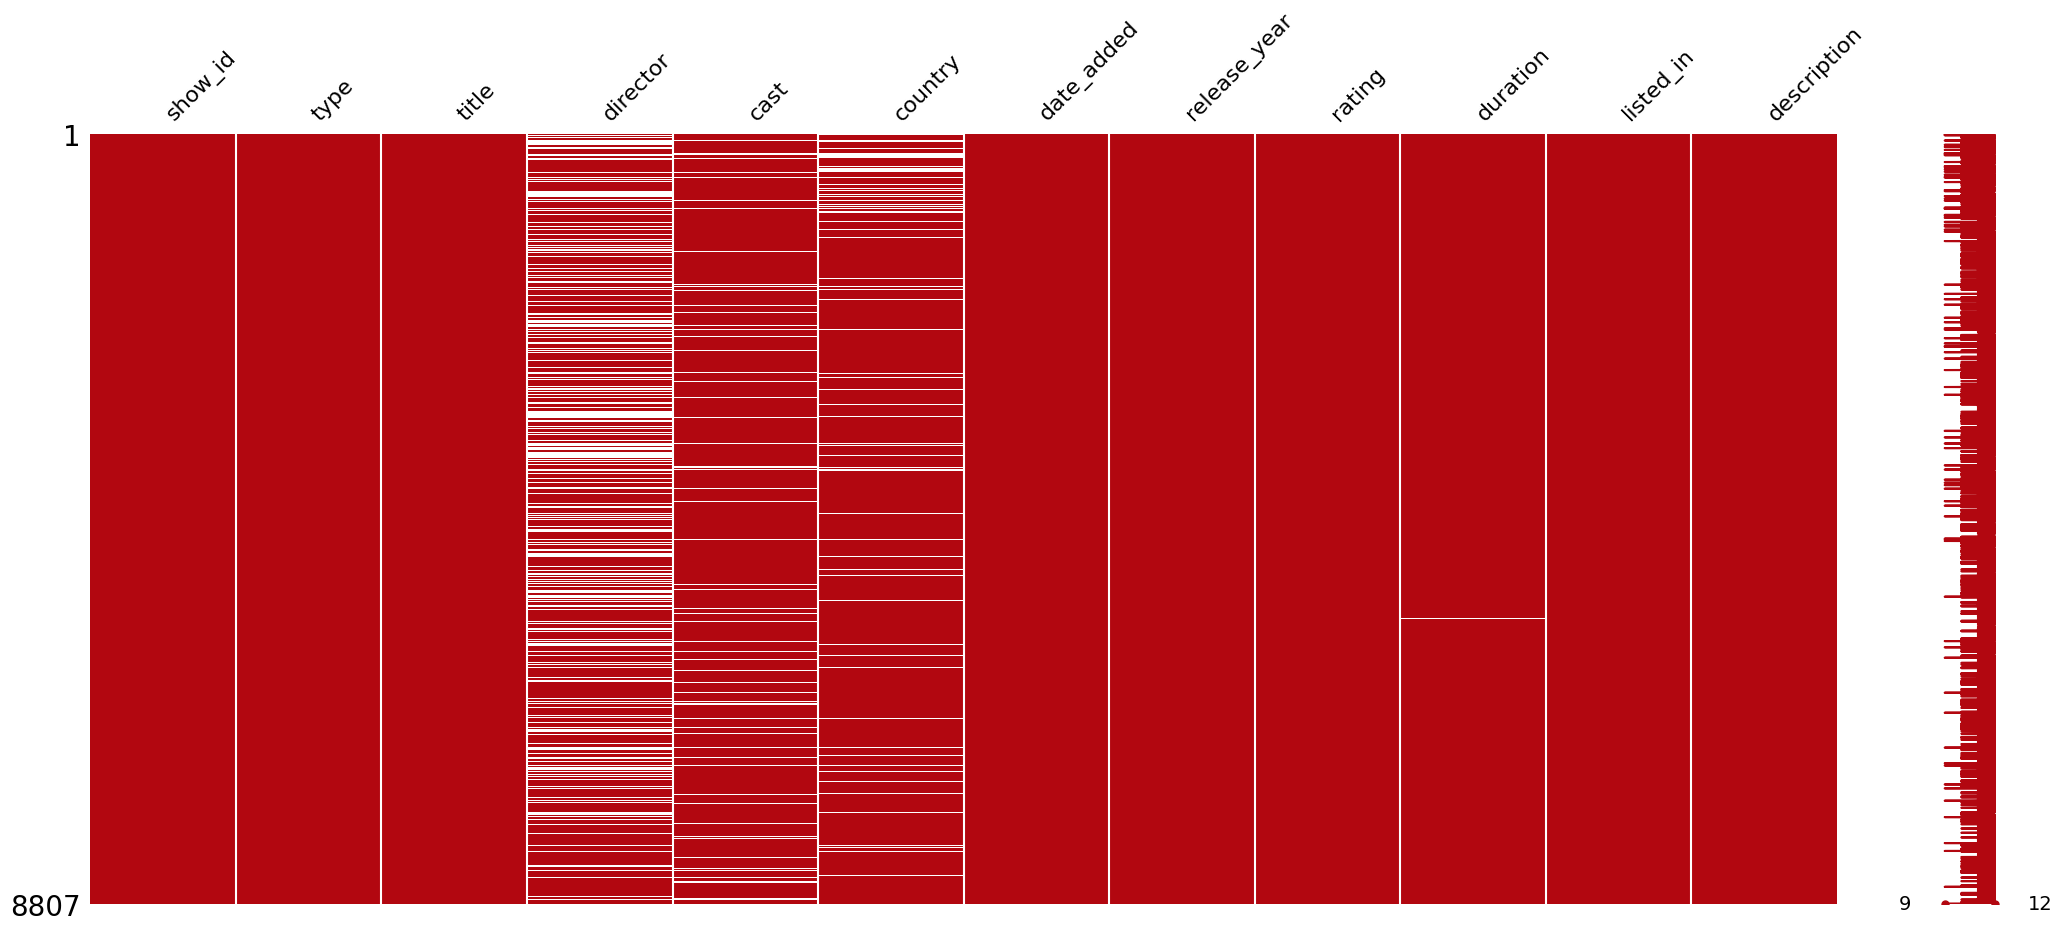

In [ ]:
# Visão geral dos valores nulos em cada atributo do dataset ANTES do tratamento
ms.matrix(netflix, color=(178/255, 7/255, 16/255))

Depois dos tratamentos:

<Axes: >

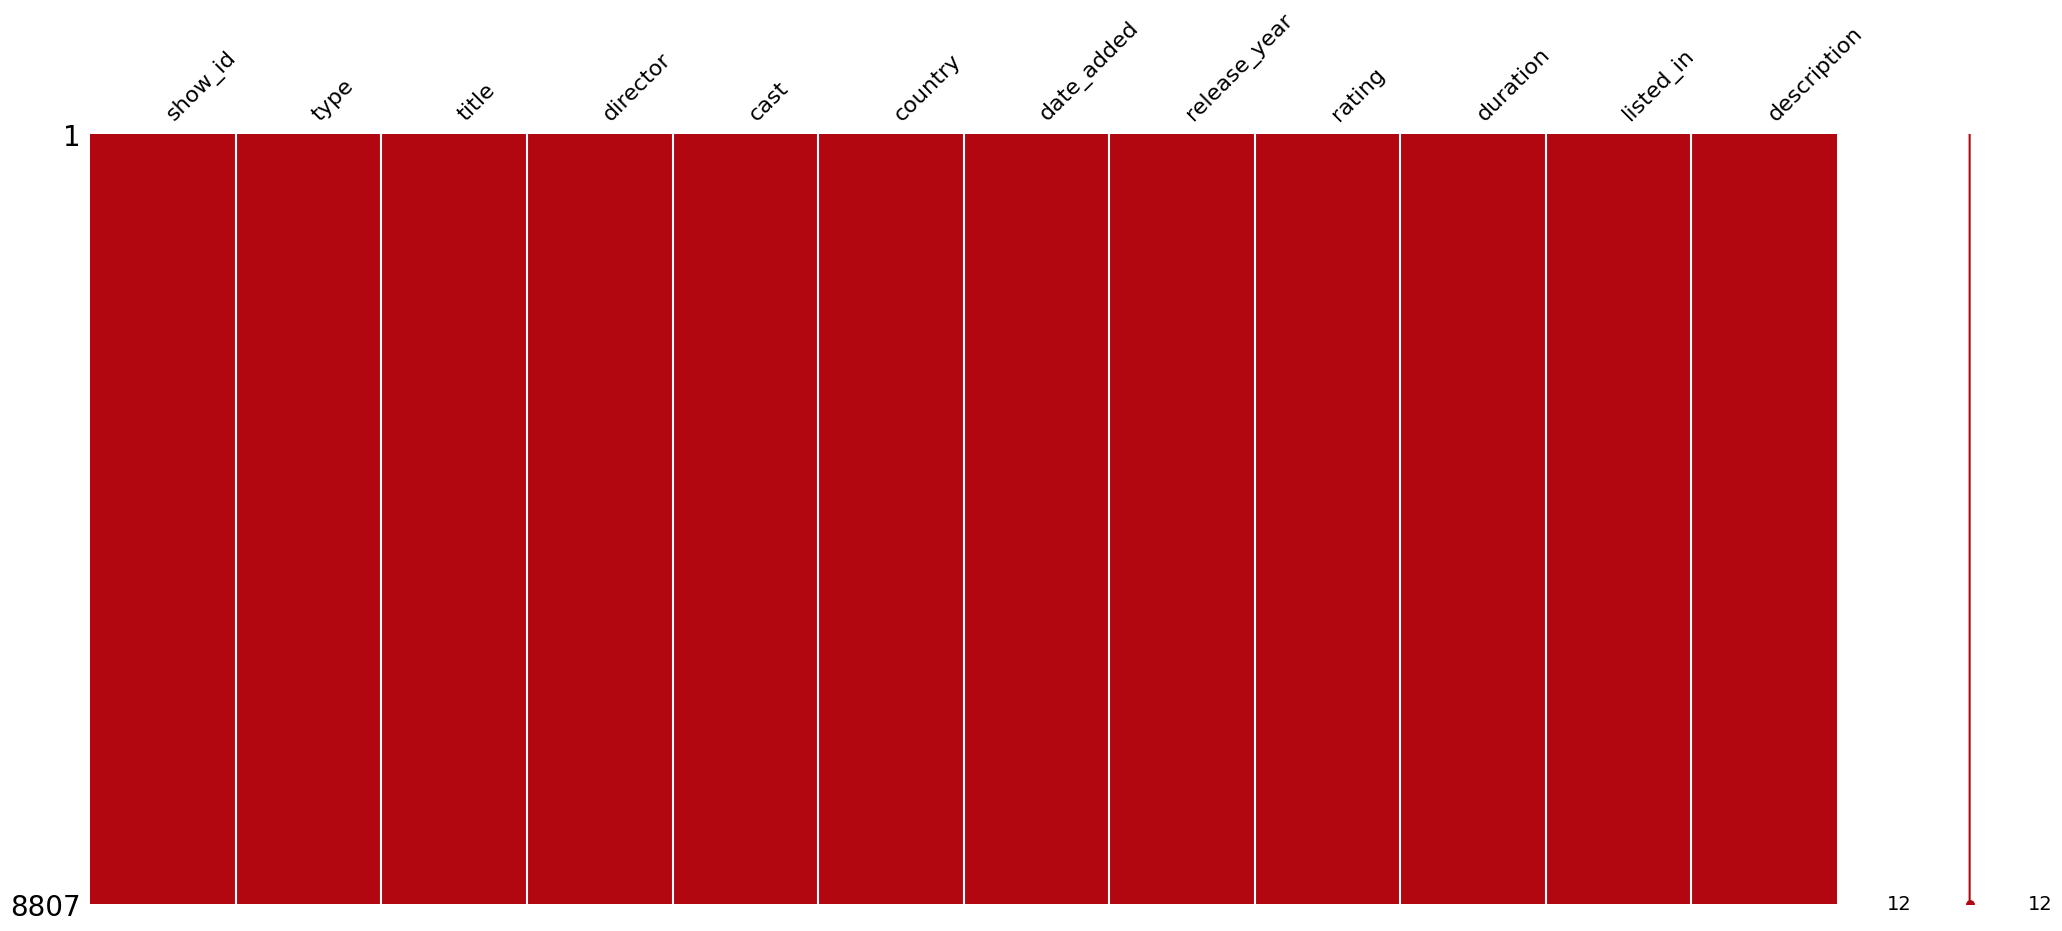

In [ ]:
# Visão geral dos valores nulos em cada atributo do dataset DEPOIS do tratamento
ms.matrix(netflixSemNulos, color=(178/255, 7/255, 16/255))

In [ ]:
#Exibindo o total de registros com atributos nulos
netflixSemNulos.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<br><br><br>

## 5.3. Criações e transformações de atributos

### 5.3.1. Country

Algumas instâncias possuem mais de um país citado no atributo **country**. Esta situação poderá trazer uma dificuldade para a análise dos conteúdos por país Listando alguns exemplos neste cenário:

In [ ]:
# Identificando instâncias que possuem mais de um país no campo 'country'
paises_incorretos = netflixSemNulos[netflixSemNulos['country'].str.contains(",")][['show_id','type', 'title','country']].head(5)

# Armazenando os show_id em um array específico, para consultar após atualização do atributo
id_paises_incorretos = paises_incorretos['show_id'].tolist()

# Listando os primeiros 5 registros
paises_incorretos.head(5)

,show_id,type,title,country
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin..."
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic"
29,s30,Movie,Paranoia,"United States, India, France"
38,s39,Movie,Birth of the Dragon,"China, Canada, United States"
46,s47,Movie,Safe House,"South Africa, United States, Japan"


**Decisão:**

Como não será utilizada nenhuma fonte externa para validar e corrigir estes dados, utilizaremos como premissa manter o primeiro país citado como sendo o principal:

In [ ]:
# Separando os valores do atributo 'country' que possuam vírgula em várias strings, e mantendo apenas a primeira
# Isso fará com que o atributo seja atualizado com o primeiro país da lista, caso exista mais de um listado.
netflixSemNulos['country'] = netflixSemNulos['country'].apply(lambda x: x.split(",")[0])

In [ ]:
# Confirmando que os 5 exemplos citados anteriormente foram atualizados
netflixSemNulos[netflixSemNulos['show_id'].isin(id_paises_incorretos)][['show_id','type', 'title','country']].head(5)

,show_id,type,title,country
7,s8,Movie,Sankofa,United States
12,s13,Movie,Je Suis Karl,Germany
29,s30,Movie,Paranoia,United States
38,s39,Movie,Birth of the Dragon,China
46,s47,Movie,Safe House,South Africa


In [ ]:
# Verificando que não estem mais registros que possuem mais de um país no campo 'country'
netflixSemNulos[netflixSemNulos['country'].str.contains(",")][['type', 'title','country']].count()

type       0
title      0
country    0
dtype: int64

As informações de países que produziram os conteúdos (atributo **country**) agora estão ajustadas.

<br><br><br>

### 5.3.2. Seasons

Conforme identificado na seção "Informações gerais", o atributo **duration** está sendo utilizado para armazenar dois tipos diferentes de informação:
* a duração em minutos para filmes
* a quantidade de temporadas (seasons) para séries

Os exemplos a seguir demonstram este cenário:

In [ ]:
netflixSemNulos.head(7)[['show_id', 'type', 'title','duration']]

,show_id,type,title,duration
0,s1,Movie,Dick Johnson Is Dead,90 min
1,s2,TV Show,Blood & Water,2 Seasons
2,s3,TV Show,Ganglands,1 Season
3,s4,TV Show,Jailbirds New Orleans,1 Season
4,s5,TV Show,Kota Factory,2 Seasons
5,s6,TV Show,Midnight Mass,1 Season
6,s7,Movie,My Little Pony: A New Generation,91 min


Para corrigir esta situação, será aplicada a técnica de Criação de Recursos (feature engineering), criando um novo atributo **seasons** no dataset tratado (netflixSemNulos), que irá armazenar a quantidade de temporadas, quando o atributo 'duration' possuir o trecho "Season".

Para que os valores desta coluna sejam numéricos, caso não exista nenhum valor de temporadas para uma instância, este novo atributo **seasons** terá o valor 0:

In [ ]:
# Extraindo dados do atributo 'duration' para gerar um novo atributo seasons

# Se encontrar o trecho "Season" no atributo 'duration', separa (split) os valores pela string " "
# e captura o primeiro elemento ([0]), salvando esta quantidade em um novo atributo 'season'.
# Caso contrário, o novo atributo 'season' será nulo para esta instância
netflixSemNulos['seasons'] = netflixSemNulos.apply(lambda x : int(x['duration'].split(" ")[0]) if "Season" in x['duration'] else 0, axis = 1)

netflixSemNulos.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Não informado,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,Não informado,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Não informado,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Não informado,Não informado,Não informado,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,Não informado,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2


In [ ]:
# Confirmando que o novo atributo é do tipo inteiro:
print(netflixSemNulos['seasons'].dtype)

int64


Em seguida, os valores do atributo **duration** serão atualizados para armazenar apenas a quantidade de minutos como um valor inteiro, quando este não possuir o trecho "Season" (indicando que está armazenando a duração em minutos).

As demais instâncias que possuírem o trecho "Season" neste atributo serão atualizadas com valor 0, pois estas já foram derivadas para o novo atributo **seasons**, mantendo o atributo **duration** apenas com a informação que é relevante.

In [ ]:
# Ajustando os valores armazenados no atributo 'duration'

# Se o trecho "Season" não for encontrado no atributo 'duration', separa (split) os valores pela string " "
# e captura o primeiro elemento ([0]), atualizando esta quantidade no atributo 'duration'.
# Caso contrário, o valor para o atributo 'duration' será nulo para esta instância.

netflixSemNulos['duration'] = netflixSemNulos.apply(lambda x : int(x['duration'].split(" ")[0]) if "Season" not in x['duration'] else 0, axis = 1)
netflixSemNulos.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Não informado,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,Não informado,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Não informado,"September 24, 2021",2021,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Não informado,Não informado,Não informado,"September 24, 2021",2021,TV-MA,0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,Não informado,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2


In [ ]:
# Confirmando que o atributo 'duration' agora é do tipo inteiro:
print(netflixSemNulos['duration'].dtype)

int64


<br><br><br>

### 5.3.3. Duration_minutes

Para facilitar a análise, o atributo **duration** será renomeado para **duration_minutes** para indicar que os valores numéricos deste atributo são referentes à duração em minutos.

In [ ]:
# Renomeando a coluna 'duration' para 'duration_minutes' direto no dataframe existente (inplace=True)
netflixSemNulos.rename(columns={'duration': 'duration_minutes'}, inplace=True)

netflixSemNulos.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_minutes,listed_in,description,seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Não informado,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,Não informado,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Não informado,"September 24, 2021",2021,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Não informado,Não informado,Não informado,"September 24, 2021",2021,TV-MA,0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,Não informado,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2


As transformações realizadas garantem que as informações de quantidade de temporadas (seasons) e duração do conteúdo em minutos (duration_minutes) estejam corretas e bem estruturadas, facilitando a análise exploratória mais detalhada que será realizada mais a frente.

<br><br><br>

### 5.3.4. Target_ages

Os valores do campo **rating** não são muito descritivos, pois correspondem aos códigos de classificação de conteúdo:

In [ ]:
# Obtendo os valores existentes no atributo 'rating' e ordenando-os:
ratings = sorted(netflixSemNulos['rating'].unique())

# Convertendo a lista em uma string separada por vírgulas
ratings = ', '.join(ratings)

# Exibindo os valores existentes no atributo 'rating':
print(f'Valores únicos do atributo "rating": {ratings}')

Valores únicos do atributo "rating": G, NC-17, NR, PG, PG-13, R, TV-14, TV-G, TV-MA, TV-PG, TV-Y, TV-Y7, TV-Y7-FV, UR


Para melhorar o entendimento, será criado um novo atributo com o público alvo de cada classificação (rating), com base no mapeamento a seguir:

* **Crianças (todas as idades)**
  * G
  * TV-G
  * TV-Y

* **Crianças mais velhas (7 anos ou mais)**
  * PG
  * TV-PG
  * TV-Y7
  * TV-Y7-FV

* **Adolescentes  (13 anos ou mais)**
  * PG-13

* **Jovens adultos (16 anos ou mais)**
  * TV-14

* **Adultos (18 anos ou mais)**
  * NC-17
  * NR
  * R
  * TV-MA
  * UR

<br>

Os termos serão mantidos em inglês, para seguir o padrão da estrutura e dados atuais do dataset.

Fontes:
* https://www.primevideo.com/help/ref=atv_hp_nd_cnt?language=pt_PT&nodeId=GFGQU3WYEG6FSJFJ

* https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system
  * Esta, especificamente para os códigos R (Restricted), NR (Not Rated) e UR (Unrated).  


In [ ]:
# Criando um mapeamento entre o código do rating e seu respectivo público-alvo:
ratings_ages = {
'G': 'Children (all ages)',
'TV-G': 'Children (all ages)',
'TV-Y': 'Children (all ages)',
'PG': 'Older Children (7 years and up)',
'TV-PG': 'Older Children (7 years and up)',
'TV-Y7': 'Older Children (7 years and up)',
'TV-Y7-FV': 'Older Children (7 years and up)',
'PG-13': 'Teenagers (13 years and up)',
'TV-14': 'Young Adults (16 years and up)',
'NC-17': 'Adults (18 years and up)',
'NR': 'Adults (18 years and up)',
'R': 'Adults (18 years and up)',
'TV-MA': 'Adults (18 years and up)',
'UR': 'Adults (18 years and up)'
}

# Criando um novo atributo 'target_ages'.
# Para cada instância do dataset, ler o valor do atributo 'rating' e popular
# este novo atributo 'rating_ages' com o público-alvo correspondente no mapeamento criado acima
netflixSemNulos['target_ages'] = netflixSemNulos['rating'].replace(ratings_ages)

# Exibindo uma amostra do dataset para confirmar a atualização:
netflixSemNulos.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_minutes,listed_in,description,seasons,target_ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Não informado,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",0,Teenagers (13 years and up)
1,s2,TV Show,Blood & Water,Não informado,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Adults (18 years and up)
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Não informado,"September 24, 2021",2021,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Adults (18 years and up)
3,s4,TV Show,Jailbirds New Orleans,Não informado,Não informado,Não informado,"September 24, 2021",2021,TV-MA,0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Adults (18 years and up)
4,s5,TV Show,Kota Factory,Não informado,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Adults (18 years and up)
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Não informado,"September 24, 2021",2021,TV-MA,0,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1,Adults (18 years and up)
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Não informado,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,0,Older Children (7 years and up)
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",0,Adults (18 years and up)
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,0,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,Young Adults (16 years and up)
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,0,Teenagers (13 years and up)


<br><br><br>

### 5.3.5. Month_added e Year_added

O atributo **date_added** atualmente possui datas armazenadas como texto, dificultando a análise mais detalhada por anos ou meses:

In [ ]:
# Tipo atual do atributo 'date_added'
print(netflixSemNulos['date_added'].dtype)

object


In [ ]:
# Exibindo o valor do atributo 'date_added' para as primeiro 5 instâncias
netflixSemNulos.head(5)[['date_added']]

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"


Para facilitar as análises, este atributo será atualizado para o tipo datetime:

In [ ]:
# Convertendo o atributo 'date_added' para o tipo datetime
netflixSemNulos["date_added"] = pd.to_datetime(netflixSemNulos['date_added'])

# Novo tipo do atributo 'date_added'
print(netflixSemNulos['date_added'].dtype)

datetime64[ns]


In [ ]:
# Exibindo o valor do atributo 'date_added' para as primeiro 5 instâncias, após conversão:
netflixSemNulos.head(5)[['date_added']]

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24


Em seguida, serão criados dois novos atributos derivados deste, para permitir uma análise mais detalhada do catálogo: **year_added** e **month_added**.

In [ ]:
# Criando dois novos atributos no dataframe, com base no valor de 'date_added':
netflixSemNulos['month_added'] = netflixSemNulos['date_added'].dt.month
netflixSemNulos['year_added'] = netflixSemNulos['date_added'].dt.year

# Exibindo os novos atributos com as 5 últimas instâncias como exemplo:
netflixSemNulos.tail(5)[['date_added', 'month_added', 'year_added']]

,date_added,month_added,year_added
8802,2019-11-20,11,2019
8803,2019-07-01,7,2019
8804,2019-11-01,11,2019
8805,2020-01-11,1,2020
8806,2019-03-02,3,2019


Como a plataforma foi lançada em 2010, é importante verificar se existe alguma instância com ano de publicação (year_added) menor que 2010:

In [ ]:
# Verificando se existem registros com data de publicação no catálogo menor do que
# a data de lançamento da plataforma (2010)
netflixSemNulos[netflixSemNulos['year_added'] < 2010]['show_id'].count()

4

In [ ]:
registros_para_atualizar = netflixSemNulos[netflixSemNulos['year_added'] < 2010]
registros_para_atualizar.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_minutes,listed_in,description,seasons,target_ages,month_added,year_added
5955,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-MA,29,Horror Movies,"After committing suicide, a washed-up rocker r...",0,Adults (18 years and up),11,2009
5956,s5957,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,TV-MA,104,"Dramas, International Movies",When he causes a car accident that leaves a yo...,0,Adults (18 years and up),5,2009
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,TV-MA,81,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",0,Adults (18 years and up),1,2008
6611,s6612,TV Show,Dinner for Five,Não informado,Não informado,United States,2008-02-04,2007,TV-MA,0,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",1,Adults (18 years and up),2,2008


Estes 4 registros serão atualizados com data de disponibilização no catálogo 31 de dezembro de 2019 (ano mais comum de lançamento de conteúdos já calculado anteriormente):

In [ ]:
# Atualiza os valores dos atributos 'date_added', 'year_added' e 'month_added' para 31 de dezembro de 2019,
# para os registros que possuem data < 2010 (salvos anteriormente no dataframe registros_para_atualizar)
netflixSemNulos.loc[registros_para_atualizar.index, 'date_added'] = pd.to_datetime('2019-12-31')
netflixSemNulos.loc[registros_para_atualizar.index, 'year_added'] = 2019
netflixSemNulos.loc[registros_para_atualizar.index, 'month_added'] = 12

In [ ]:
# Verificando se ainda existem registros com data de publicação no catálogo menor do que
# a data de lançamento da plataforma (2010)
netflixSemNulos[netflixSemNulos['year_added'] < 2010]['show_id'].count()

0

Todos os registros foram atualizados.

<br><br><br>

### 5.3.6. Release_gap

Como temos os atributos **release_year**, que indica a data de lançamento de um conteúdo, e **year_added**, que indica o ano em que o conteúdo foi disponibilizado na plataforma, podemos analisar quanto tempo a plataforma demorou para disponibilizar um conteúdo após seu lançamento.

Para isso, será criado um novo atributo **release_gap**, que calculará a diferença entre estes dois anos:

In [ ]:
# Cria um novo atributo 'release_gap' no DataFrame, sendo a diferença entre
# o ano de lançamento do conteúdo e o ano em que foi disponibilizado na plataforma
netflixSemNulos['release_gap'] = netflixSemNulos['year_added'] - netflixSemNulos['release_year']

# Validando uma amostra dos dados
netflixSemNulos.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_minutes,listed_in,description,seasons,target_ages,month_added,year_added,release_gap
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Não informado,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",0,Teenagers (13 years and up),9,2021,1
1,s2,TV Show,Blood & Water,Não informado,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Adults (18 years and up),9,2021,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Não informado,2021-09-24,2021,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Adults (18 years and up),9,2021,0


In [ ]:
# Verificando se existem registros com esta data menor que zero, o que indica um erro nos dados
netflixSemNulos[netflixSemNulos['release_gap'] < 0]['show_id'].count()

14

14 instâncias possuem a data de lançamento maior do que a data em que foram disponibilizadas na plataforma, indicando um erro em alguma destas duas datas, já que um conteúdo não pode ter sido disponibilizado no catálogo antes de ter sido lançado.

Poderíamos validar a data de lançamento dos conteúdos em bases externas (IMDB, por exemplo), mas em função do volume de instâncias e do esforço para esta validação, a decisão será adotar o valor 0 para o atributo **release_gap** destas instâncias:

In [ ]:
# Atualizando o valor do atributo 'release_gap' para 0, para as instâncias com release_gap < 0
netflixSemNulos.loc[netflixSemNulos['release_gap'] < 0, 'release_gap'] = 0

In [ ]:
# Verificando se existem registros com esta data menor que zero, o que indica um erro nos dados
netflixSemNulos[netflixSemNulos['release_gap'] < 0]['show_id'].count()

0

Após correção dos valores, não existem mais instâncias com o atributo **release_gap** fora do valor esperado.

<br><br><br>

# 6. Análise exploratória dos dados

Após o tratamento de valores nulos e transformações realizadas, os dados já estão prontos para serem analisado em detalhes. Como não será mais necessário armazenar os valores originais (sem as transformações), o dataframe **netflix** será sobrescrito com o conteúdo e estrutura do dataframe **netflixSemNulos**, que será excluído.

In [ ]:
# Sobrescrevendo o conteúdo do dataFrame 'netflix' com uma cópia do dataframe 'netflixSemNulos'
netflix = netflixSemNulos.copy()

# Excluindo o DataFrame 'netflixSemNulos'
del netflixSemNulos

# Visualizando uma prévia do "novo" dataframe 'netflix':
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_minutes,listed_in,description,seasons,target_ages,month_added,year_added,release_gap
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Não informado,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",0,Teenagers (13 years and up),9,2021,1
1,s2,TV Show,Blood & Water,Não informado,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Adults (18 years and up),9,2021,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Não informado,2021-09-24,2021,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Adults (18 years and up),9,2021,0
3,s4,TV Show,Jailbirds New Orleans,Não informado,Não informado,Não informado,2021-09-24,2021,TV-MA,0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Adults (18 years and up),9,2021,0
4,s5,TV Show,Kota Factory,Não informado,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Adults (18 years and up),9,2021,0


<br><br><br>

## 6.1. Resumo estatístico

Realizando um resumo estatístico com os atributos atualizados:

In [ ]:
# Resumo estatístico do dataset (que exibirá apenas resumos sobre atributos numéricos)
resumo_estatistico = netflix.describe()

# Calculando a moda para cada coluna do dataframe e adiciona como uma nova linha
resumo_estatistico.loc['mode', :] = netflix.mode().iloc[0]

# Exibindo as medidas calculadas
resumo_estatistico.head(10)


,release_year,duration_minutes,seasons,month_added,year_added,release_gap
count,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000
mean,2014.180198,69.312252,0.536278,6.664358,2018.876803,4.698535
std,8.819312,51.519154,1.191620,3.439953,1.557707,8.783997
min,1925.000000,0.000000,0.000000,1.000000,2010.000000,0.000000
25%,2013.000000,0.000000,0.000000,4.000000,2018.000000,0.000000
50%,2017.000000,88.000000,0.000000,7.000000,2019.000000,1.000000
75%,2019.000000,106.000000,1.000000,10.000000,2020.000000,5.000000
max,2021.000000,312.000000,17.000000,12.000000,2021.000000,93.000000
mode,2018.000000,0.000000,0.000000,7.000000,2019.000000,0.000000


Com base neste resumo estatístico, é possivel analisar os dados em visões específicas por cada atributo:


### 6.1.1. Data de lançamento dos conteúdos (release_year)

In [ ]:
# Exibindo as medidas calculadas apenas para este atributo
resumo_estatistico.head(10)['release_year']

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
mode     2018.000000
Name: release_year, dtype: float64

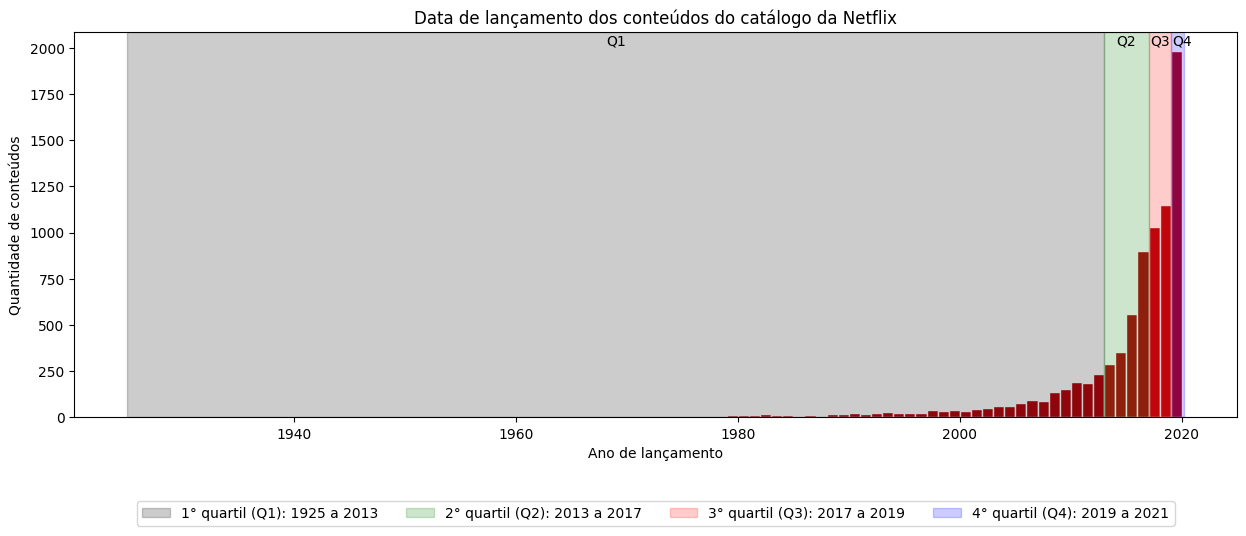

In [ ]:
# Criando uma cópia do dataset netflix
df = netflix.copy()

# Calculando os valores mínimos, máximos e os quartis do atributo 'release_year', para dimensionar o gráfico
min = df['release_year'].min()
Q1 = df['release_year'].quantile(0.25)
Q2 = df['release_year'].quantile(0.50)
Q3 = df['release_year'].quantile(0.75)
maximo = df['release_year'].max()

# Definindo o tamanho do gráfico
plt.figure(figsize=(15, 5))

# Criando um histograma com a quantidade de Bins sendo o range dos anos calculado acima (valores min e max)
plt.hist(df['release_year'], bins=range(min, maximo), edgecolor='white', color='#b20710')

# Adicionando as áreas de destaque para os quartis
plt.axvspan(min, Q1, alpha=0.2, color='black')
plt.axvspan(Q1, Q2, alpha=0.2, color='green')
plt.axvspan(Q2, Q3, alpha=0.2, color='red')
plt.axvspan(Q3, maximo-0.8, alpha=0.2, color='blue')

# Obtendo os limites do eixo y para posicionamento dos labels (96% do tamanho do eixo y)
posicao_topo = plt.ylim()[1] * 0.96

# Adicionando rótulos no topo das áreas de destaque
plt.text((min + Q1) / 2, posicao_topo, 'Q1', ha='center', va='bottom', fontsize=10)
plt.text((Q1 + Q2) / 2, posicao_topo, 'Q2', ha='center', va='bottom', fontsize=10)
plt.text((Q2 + Q3) / 2, posicao_topo, 'Q3', ha='center', va='bottom', fontsize=10)
plt.text((Q3 + maximo) / 2, posicao_topo, 'Q4', ha='center', va='bottom', fontsize=10)

# Criando os itens para a legenda
legenda_1_quartil = mpatches.Patch(color='black', alpha=0.2, label= '1° quartil (Q1): {} a {}'.format(int(min), int(Q1)))
legenda_2_quartil = mpatches.Patch(color='green', alpha=0.2, label= '2° quartil (Q2): {} a {}'.format(int(Q1), int(Q2)))
legenda_3_quartil = mpatches.Patch(color='red', alpha=0.2, label= '3° quartil (Q3): {} a {}'.format(int(Q2), int(Q3)))
legenda_4_quartil = mpatches.Patch(color='blue', alpha=0.2, label= '4° quartil (Q4): {} a {}'.format(int(Q3), int(maximo)))

# Adicionando a legenda ao gráfico
plt.legend(handles=[legenda_1_quartil, legenda_2_quartil, legenda_3_quartil, legenda_4_quartil], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4)

plt.xlabel('Ano de lançamento')
plt.ylabel('Quantidade de conteúdos')
plt.title('Data de lançamento dos conteúdos do catálogo da Netflix')
plt.show()

Com base na análise estatística específica deste atributo e o histograma gerado, podemos identificar que:

* A média de ano de lançamento dos conteúdos do catálogo é 2014. Isso não indica que foram disponibilizados na plataforma neste período, mas lançados para o mercado;

* Analisar apenas a média individualmente não explicará todo o contexto e por isso analisamos também a mediana, que indica que 50% do conteúdo do catálogo foi lançado após 2017;

* A média (2014) dos lançamentos é um pouco menor do que a mediana (2017), indicando que existem alguns conteúdos muito antigos disponíveis no catálogo, que estão "puxando" a média para baixo, ainda que a maioria das instâncias tenham sido lançadas próximas ou a partir de 2017. Se a quantidade de filmes antigos fosse maior, a média seria ainda menor do que 2014;

* O desvio padrão indica que a maioria dos conteúdos foram lançados em uma faixa de menos ou mais 8 anos a partir de 2014 (média), ou seja, a grande maioria dos conteúdos foram produzidos entre 2006 e 2022;

* O conteúdo mais antigo do catálogo foi lançado em 1925, enquanto o conteúdo mais recente é de 2021;

* A grande maioria (75%) dos conteúdos disponíveis foram lançados a partir de 2013, ou seja, a maior parte do catálogo são de conteúdos recentes, lançados há no máximo 10 anos;

* Dos conteúdos existentes no catálogo, a maioria foi lançada em 2018, há cerca de 5 anos atrás.

<br><br><br>

### 6.1.2. Duração dos conteúdos em minutos (duration_minutes)

Na etapa de transformação de dados, adotamos a premissa de incluir valor 0 no atributo **duration_minutes** caso este conteúdo seja "medido" em temporadas (estas instâncias já possuem valor armazenado no atributo **seasons**).

Para que a análise seja feita de forma correta, iremos criar uma cópia do dataset contendo apenas instâncias com duração maior que 0 e realizar a análise do resumo estatístico do atributo **duration_minutes**:

In [ ]:
# Criando uma cópia do dataset, contendo apenas instâncias com duração > 0, e somente o atributo 'duration_minutes':
conteudos_com_duracao = netflix[netflix['duration_minutes'] > 0][['duration_minutes']].copy()

# Calculando um novo resumo estatístico deste dataset
resumo_duracao = conteudos_com_duracao.describe()

# Calculando a moda para cada coluna do dataframe e adiciona como uma nova linha
resumo_duracao.loc['mode', :] = conteudos_com_duracao.mode().iloc[0]

# Exibindo as medidas calculadas
resumo_duracao.head(10)

,duration_minutes
count,6131.000000
mean,99.564998
std,28.289504
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000
mode,90.000000


In [ ]:
# Verificando quais tipos de conteúdo possuem duração expressa em minutos:
netflix[netflix['duration_minutes'] > 0].groupby('type').size()

type
Movie    6131
dtype: int64

É possível validar que todos os conteúdos cuja duração esteja expressa em minutos são filmes.

<br>

Criando um histograma para complementar a análise:

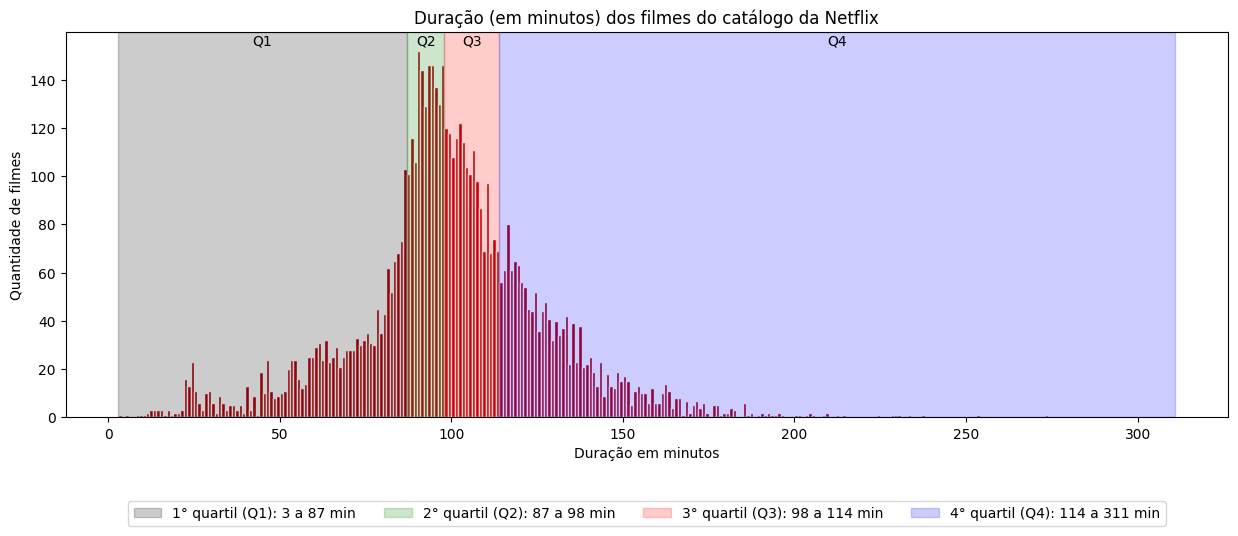

In [ ]:
# Criando uma cópia do dataset netflix contendo apenas os conteúdos com duração expressa em minutos
df = netflix[netflix['duration_minutes'] > 0].copy()

# Calculando os valores mínimos, máximos e os quartis do atributo 'duration_minutes', para dimensionar o gráfico
min = df['duration_minutes'].min()
Q1 = df['duration_minutes'].quantile(0.25)
Q2 = df['duration_minutes'].quantile(0.50)
Q3 = df['duration_minutes'].quantile(0.75)
maximo = df['duration_minutes'].max()

# Definindo o tamanho do gráfico
plt.figure(figsize=(15, 5))

# Criando um histograma com a quantidade de Bins sendo o range dos anos calculado acima (valores min e max)
hist, bins, _ = plt.hist(df['duration_minutes'], bins=range(min, maximo), edgecolor='white', color='#b20710')

# Adicionando as áreas de destaque para os quartis
plt.axvspan(min, Q1, alpha=0.2, color='black')
plt.axvspan(Q1, Q2, alpha=0.2, color='green')
plt.axvspan(Q2, Q3, alpha=0.2, color='red')
plt.axvspan(Q3, maximo-1, alpha=0.2, color='blue')

# Obtendo os limites do eixo y para posicionamento dos labels (96% do tamanho do eixo y)
posicao_topo = plt.ylim()[1] * 0.96

# Adicionando rótulos no topo das áreas de destaque
plt.text((min + Q1) / 2, posicao_topo, 'Q1', ha='center', va='bottom', fontsize=10)
plt.text((Q1 + Q2) / 2, posicao_topo, 'Q2', ha='center', va='bottom', fontsize=10)
plt.text((Q2 + Q3) / 2, posicao_topo, 'Q3', ha='center', va='bottom', fontsize=10)
plt.text((Q3 + maximo-1) / 2, posicao_topo, 'Q4', ha='center', va='bottom', fontsize=10)

# Criando os itens para a legenda
legenda_1_quartil = mpatches.Patch(color='black', alpha=0.2, label= '1° quartil (Q1): {} a {} min'.format(int(min), int(Q1)))
legenda_2_quartil = mpatches.Patch(color='green', alpha=0.2, label= '2° quartil (Q2): {} a {} min'.format(int(Q1), int(Q2)))
legenda_3_quartil = mpatches.Patch(color='red', alpha=0.2, label= '3° quartil (Q3): {} a {} min'.format(int(Q2), int(Q3)))
legenda_4_quartil = mpatches.Patch(color='blue', alpha=0.2, label= '4° quartil (Q4): {} a {} min'.format(int(Q3), int(maximo)-1))

# Adicionando a legenda ao gráfico
plt.legend(handles=[legenda_1_quartil, legenda_2_quartil, legenda_3_quartil, legenda_4_quartil], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4)

plt.xlabel('Duração em minutos')
plt.ylabel('Quantidade de filmes')
plt.title('Duração (em minutos) dos filmes do catálogo da Netflix')
plt.show()

Com base na análise estatística específica deste atributo e o histograma gerado, podemos identificar que:

* Dos 8807 conteúdos existentes no catálogo, 6131 deles possuem uma duração expressa em minutos. Estes são exclusivamente filmes e correspondem 70% do catálogo da Netflix;

* A média da duração dos filmes é de aproximadamente 99 minutos, cerca de 1 hora e 40 minutos;

* A duração mínima observada é de 3 minutos, o que pode indicar que existem curta-metragens no catálogo, ou que existem problemas na coleta dos dados de duração para determinados filmes;

* O filme mais longo do catálogo possui 312 minutos de duração, ou 5 horas e 12 minutos.

* 25% dos filmes possuem duração igual ou inferior à 87 minutos, o que indica que a grande maioria dos filmes (75%) possui pelo menos 1 hora e 27 minutos de duração.

* A duração mais frequente (moda) no catálogo é de 90 minutos, ou 1 hora e 30 minutos.

* O desvio padrão é de aproximadamente 28 minutos, o que indica uma pequena dispersão dos dados em relação à media (99 minutos).

* A distrbuição dos dados não é normal, pois os valores de média, moda e mediana são distintos, apesar de serem próximos. Pode-se dizer que a distribuição se aproxima de uma distribuição normal.



<br><br><br>

### 6.1.3. Quantidade de temporadas (seasons)

Na etapa de transformação de dados, adotamos a premissa de incluir valor 0 no atributo **seasons** caso este conteúdo seja "medido" em minutos (estas instâncias já possuem valor armazenado no atributo **duration_minutes**).

Para que a análise seja feita de forma correta, iremos criar uma cópia do dataset contendo apenas instâncias com 1 ou mais temporadas e realizar a análise do resumo estatístico do atributo **seasons**:

In [ ]:
# Criando uma cópia do dataset, contendo apenas instâncias que possuam temporadas (seasons > 1) e somente o atributo 'seasons':
conteudos_com_temporada = netflix[netflix['seasons'] > 0][['seasons']].copy()

# Calculando um novo resumo estatístico deste dataset
resumo_temporadas = conteudos_com_temporada.describe()

# Calculando a moda para cada coluna do dataframe e adiciona como uma nova linha
resumo_temporadas.loc['mode', :] = conteudos_com_temporada.mode().iloc[0]

# Exibindo as medidas calculadas
resumo_temporadas.head(10)

,seasons
count,2676.000000
mean,1.764948
std,1.582752
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,17.000000
mode,1.000000


In [ ]:
# Verificando quais tipos de conteúdo possuem duração expressa em minutos:
netflix[netflix['seasons'] > 0].groupby('type').size()

type
TV Show    2676
dtype: int64

É possível validar que todos os conteúdos que possuem temporadas são séries.

<br>

Criando um histograma para complementar a análise:

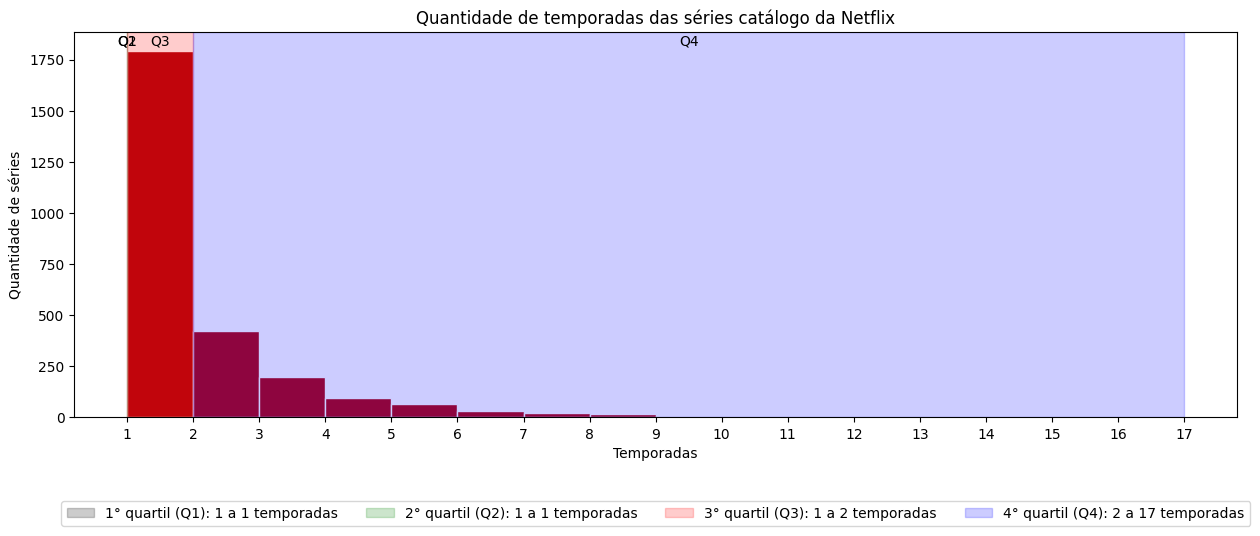

In [ ]:
# Criando uma cópia do dataset netflix contendo apenas os conteúdos com duração expressa em minutos
df = netflix[netflix['seasons'] > 0].copy()

# Calculando os valores mínimos, máximos e os quartis do atributo 'seasons', para dimensionar o gráfico
min = df['seasons'].min()
Q1 = df['seasons'].quantile(0.25)
Q2 = df['seasons'].quantile(0.50)
Q3 = df['seasons'].quantile(0.75)
maximo = df['seasons'].max()

# Definindo o tamanho do gráfico
plt.figure(figsize=(15, 5))

# Criando um histograma com a quantidade de Bins sendo o range dos anos calculado acima (valores min e max)
hist, bins, _ = plt.hist(df['seasons'], bins=range(min, maximo+1), edgecolor='white', color='#b20710')

# Adicionando as áreas de destaque para os quartis
plt.axvspan(min, Q1, alpha=0.2, color='black')
plt.axvspan(Q1, Q2, alpha=0.2, color='green')
plt.axvspan(Q2, Q3, alpha=0.2, color='red')
plt.axvspan(Q3, maximo, alpha=0.2, color='blue')

# Obtendo os limites do eixo y para posicionamento dos labels (96% do tamanho do eixo y)
posicao_topo = plt.ylim()[1] * 0.96

# Ajustando os rótulos do eixo X para exibir todos os valores inteiros
plt.xticks(range(min, maximo+1))

# Adicionando rótulos no topo das áreas de destaque
plt.text((min + Q1) / 2, posicao_topo, 'Q1', ha='center', va='bottom', fontsize=10)
plt.text((Q1 + Q2) / 2, posicao_topo, 'Q2', ha='center', va='bottom', fontsize=10)
plt.text((Q2 + Q3) / 2, posicao_topo, 'Q3', ha='center', va='bottom', fontsize=10)
plt.text((Q3 + maximo) / 2, posicao_topo, 'Q4', ha='center', va='bottom', fontsize=10)

# Criando os itens para a legenda
legenda_1_quartil = mpatches.Patch(color='black', alpha=0.2, label= '1° quartil (Q1): {} a {} temporadas'.format(int(min), int(Q1)))
legenda_2_quartil = mpatches.Patch(color='green', alpha=0.2, label= '2° quartil (Q2): {} a {} temporadas'.format(int(Q1), int(Q2)))
legenda_3_quartil = mpatches.Patch(color='red', alpha=0.2, label= '3° quartil (Q3): {} a {} temporadas'.format(int(Q2), int(Q3)))
legenda_4_quartil = mpatches.Patch(color='blue', alpha=0.2, label= '4° quartil (Q4): {} a {} temporadas'.format(int(Q3), int(maximo)))

# Adicionando a legenda ao gráfico
plt.legend(handles=[legenda_1_quartil, legenda_2_quartil, legenda_3_quartil, legenda_4_quartil], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4)

plt.xlabel('Temporadas')
plt.ylabel('Quantidade de séries')
plt.title('Quantidade de temporadas das séries catálogo da Netflix')
plt.show()

Com base na análise estatística específica deste atributo e o histograma gerado, podemos identificar que:

* Dos 8807 conteúdos existentes no catálogo, 2676 deles são séries e possuem ao menos uma temporada, correspondendo à 30% do catálogo da Netflix;

* A média de quantidade de temporadas das séries é de aproximadamente 1,76;

* A quantidade mínima de temporadas observadas é de 1, enquanto a máxima é de 17 temporadas;

* 50% das séries possuem 1 temporada e a grande maioria (75%) das séries possuem 2 temporadas.

* A quantidade de temporadas mais comum (moda) no catálogo é 1, indicando que a maior parte das séries foi prevista para ter apenas 1 temporada, ou não tiveram sua produção renovada para os anos seguintes ao de produção;

* O desvio padrão é de aproximadamente 1,58, indicando uma baixa variabilidade na quantidade de temporadas;

* A distrbuição dos dados não é normal, pois apesar dos valores de moda e mediana serem iguais (1), a média é superior (1.76). A distribuição possui uma assimetria positiva.

<br><br><br>

### 6.1.4. Datas de publicação no catálogo da Netflix (month_added e year_added)

In [ ]:
# Exibindo as medidas calculadas apenas para estes atributos
resumo_estatistico.head(10)[['month_added', 'year_added']]

,month_added,year_added
count,8807.000000,8807.000000
mean,6.664358,2018.876803
std,3.439953,1.557707
min,1.000000,2010.000000
25%,4.000000,2018.000000
50%,7.000000,2019.000000
75%,10.000000,2020.000000
max,12.000000,2021.000000
mode,7.000000,2019.000000


Criando gráficos para apoiar a análise das medidas:

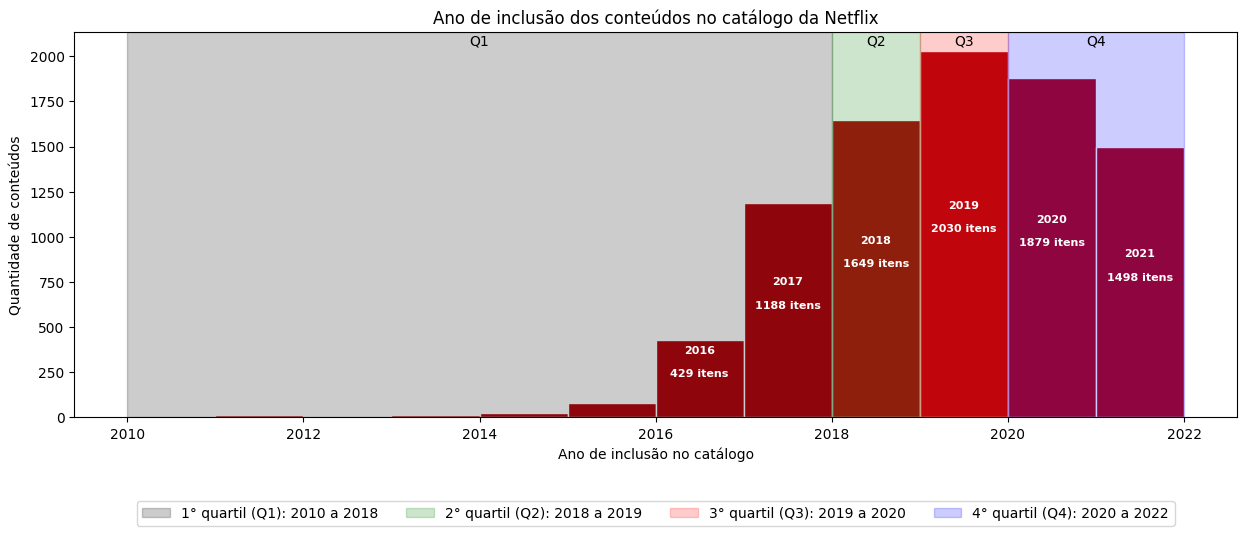

In [ ]:
# Criando uma cópia do dataset netflix
df = netflix.copy()

# Calculando os valores mínimos, máximos e os quartis do atributo 'year_added', para dimensionar o gráfico
min = df['year_added'].min()
Q1 = df['year_added'].quantile(0.25)
Q2 = df['year_added'].quantile(0.50)
Q3 = df['year_added'].quantile(0.75)
maximo = 2023

# Definindo o tamanho do gráfico
plt.figure(figsize=(15, 5))

# Criando um histograma com a quantidade de Bins sendo o range dos anos calculado acima (valores min e max)
hist, bins, _ = plt.hist(df['year_added'], bins=range(min, maximo), edgecolor='white', color='#b20710')

# Adicionando as áreas de destaque para os quartis
plt.axvspan(min, Q1, alpha=0.2, color='black')
plt.axvspan(Q1, Q2, alpha=0.2, color='green')
plt.axvspan(Q2, Q3, alpha=0.2, color='red')
plt.axvspan(Q3, maximo-1, alpha=0.2, color='blue')

# Obtendo os limites do eixo y para posicionamento dos labels (96% do tamanho do eixo y)
posicao_topo = plt.ylim()[1] * 0.96

# Adicionando rótulos no topo das áreas de destaque
plt.text((min + Q1) / 2, posicao_topo, 'Q1', ha='center', va='bottom', fontsize=10)
plt.text((Q1 + Q2) / 2, posicao_topo, 'Q2', ha='center', va='bottom', fontsize=10)
plt.text((Q2 + Q3) / 2, posicao_topo, 'Q3', ha='center', va='bottom', fontsize=10)
plt.text((Q3 + maximo-1) / 2, posicao_topo, 'Q4', ha='center', va='bottom', fontsize=10)

# Criando os itens para a legenda
legenda_1_quartil = mpatches.Patch(color='black', alpha=0.2, label= '1° quartil (Q1): {} a {}'.format(int(min), int(Q1)))
legenda_2_quartil = mpatches.Patch(color='green', alpha=0.2, label= '2° quartil (Q2): {} a {}'.format(int(Q1), int(Q2)))
legenda_3_quartil = mpatches.Patch(color='red', alpha=0.2, label= '3° quartil (Q3): {} a {}'.format(int(Q2), int(Q3)))
legenda_4_quartil = mpatches.Patch(color='blue', alpha=0.2, label= '4° quartil (Q4): {} a {}'.format(int(Q3), int(maximo)-1))

# Adicionando os valores das barras no topo, apenas se for maior ou igual à 200 (levando em consideração o layout deste gráfico)
for i in range(len(bins) - 1):
    if hist[i] >= 200:
        plt.text(bins[i] + 0.5, hist[i] * 0.5, '{}\n\n{} itens'.format(int(bins[i]), int(hist[i])), ha='center', va='bottom', fontsize=8, color='white', weight='bold')


# Adicionando a legenda ao gráfico
plt.legend(handles=[legenda_1_quartil, legenda_2_quartil, legenda_3_quartil, legenda_4_quartil], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4)

plt.xlabel('Ano de inclusão no catálogo')
plt.ylabel('Quantidade de conteúdos')
plt.title('Ano de inclusão dos conteúdos no catálogo da Netflix')
plt.show()

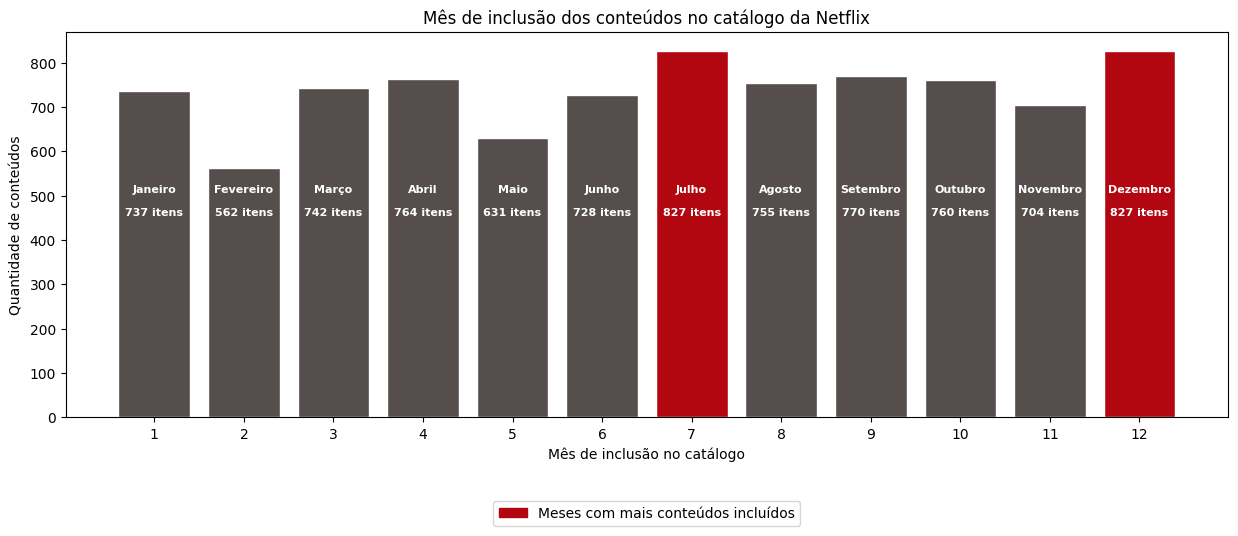

In [ ]:
# Criando uma cópia do dataset netflix
df = netflix.copy()

# Calculando os valores mínimos e máximos para dimensionar o gráfico
min = df['month_added'].min()
maximo = df['month_added'].max()+2

# Definindo o tamanho do gráfico
plt.figure(figsize=(15, 5))

# Criando um histograma com a quantidade de Bins sendo o range dos anos calculado acima (valores min e max)
hist, bins = np.histogram(df['month_added'], bins=range(min, maximo))

# Identificando as barras com o valor máximo, para em seguira colorir de uma cor diferente
indices_maximos = [i for i, valor in enumerate(hist) if valor == max(hist)]

# Definindo a cor padrão das colunas
default_color='#564d4d'
max_color='#b20710'

# Criando as barras individualmente e definindo a cor de cada uma
for i in range(len(bins) - 1):
    color = max_color if i in indices_maximos else default_color   # Se o valor desta barra for o valor máximo do gráfico, pintar de uma cor diferente
    plt.bar(bins[i], hist[i], color=color, edgecolor='white')

# Adicionando os valores das barras no centro delas
for i in range(len(bins) - 1):
    month_name = meses_dict.get(int(bins[i]), 'Desconhecido')  # Obtendo o nome do mês ou 'Desconhecido' se o número não estiver no dicionário
    plt.text(bins[i], 450, '{}\n\n{} itens'.format(month_name, int(hist[i])), ha='center', va='bottom', fontsize=8, color='white', weight='bold')


# Criando a legenda
legenda_1 = mpatches.Patch(color=max_color, alpha=1, label= 'Meses com mais conteúdos incluídos')

# Ajustando os rótulos do eixo X para exibir todos os valores inteiros
plt.xticks(range(min, maximo-1))

# Adicionando a legenda ao gráfico
plt.legend(handles=[legenda_1], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=1)

plt.xlabel('Mês de inclusão no catálogo')
plt.ylabel('Quantidade de conteúdos')
plt.title('Mês de inclusão dos conteúdos no catálogo da Netflix')
plt.show()

Com base na análise estatística específica deste atributo e o histograma gerado, podemos identificar que:

* Ao analisar o ano de publicação no catálogo (year_added), identificamos que 50% dos conteúdos foram incluídos no catálogo a partir de 2019, sendo 2019 também o ano que teve mais conteúdos publicados, com 2030 novos itens.

* O conjunto de dados analisado possui conteúdos disponibilizados entre os anos de 2010 (data de lançamento da plataforma) e 2021.

* Junho e Dezembro são os meses em que mais conteúdos foram disponibilizados na plataforma, enquanto Fevereiro é o mês onde menos conteúdos foram lançados, tendo aproximadamente 30% menos conteúdos lançados que que Junho ou Dezembro.
  * Podemos afirmar que a distribuição é bimodal
  
  * Apesar disso, nota-se uma constância de lançamento de novos conteúdos em todos os meses.

<br><br><br>

### 6.1.6. Tempo para disponibilizar um conteúdo em sua plataforma (release_gap)



In [ ]:
# Exibindo as medidas calculadas apenas para estes atributos
resumo_estatistico.head(10)[['release_gap']]

,release_gap
count,8807.000000
mean,4.698535
std,8.783997
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,93.000000
mode,0.000000


Como existem conteúdos com data de lançamento muito antigas (ex: 1925), o cálculo das medidas centrais deste atributo (release_gap) pode ser afetado consideravelmente por estes outliers.

Analisando mais a fundo este caso extremo:

In [ ]:
# Listando especificamente o conteúdo com maior gap calculado:
maior_gap = max(netflix['release_gap'])
netflix[netflix['release_gap'] == maior_gap][['show_id', 'title', 'release_year', 'year_added', 'release_gap']]

,show_id,title,release_year,year_added,release_gap
4250,s4251,Pioneers: First Women Filmmakers*,1925,2018,93


Serão criados gráficos para apoiar a análise das medidas.

Em primeiro lugar, vamos analisar o tempo para disponibilização de conteúdos no catálogo como um todo:

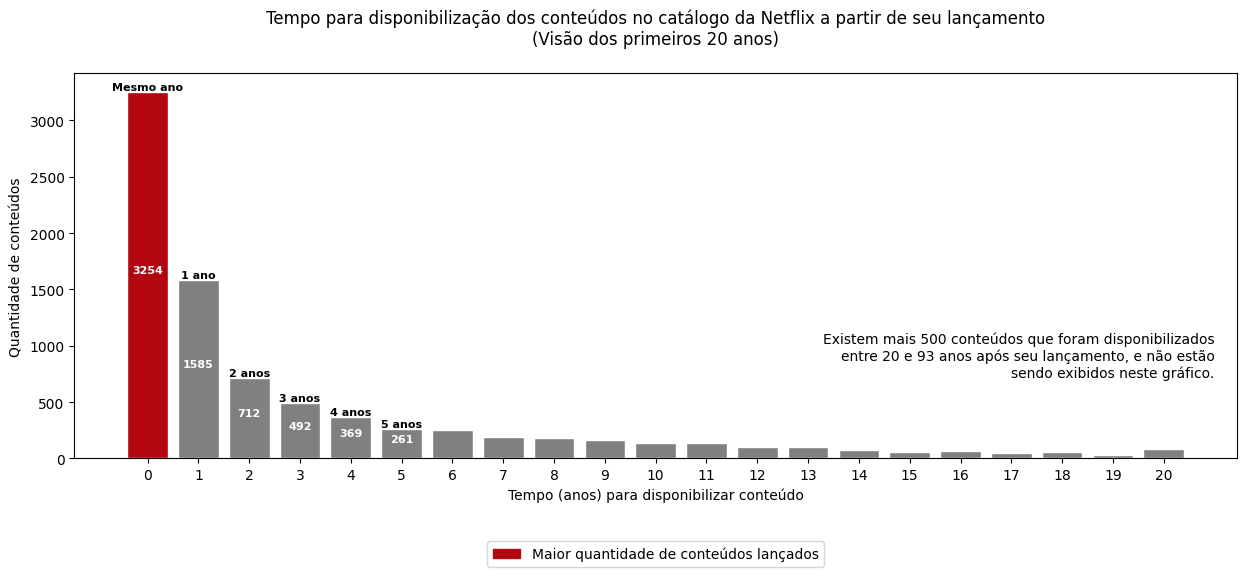

In [ ]:
# Criando uma cópia do dataset netflix
df = netflix.copy()

# Calculando os valores mínimos e máximos para dimensionar o gráfico
min = df['release_gap'].min()
#maximo = df['release_gap'].max()
maximo = 22
qtd_mais_de_20 = (df['release_gap'] > 20).sum()

# Definindo o tamanho do gráfico
plt.figure(figsize=(15, 5))

# Criando um histograma com a quantidade de Bins sendo o range dos anos calculado acima (valores min e max)
hist, bins = np.histogram(df['release_gap'], bins=range(min, maximo))

# Identificando as barras com o valor máximo, para em seguira colorir de uma cor diferente
indices_maximos = [i for i, valor in enumerate(hist) if valor == max(hist)]

# Definindo a cor padrão das colunas
#default_color='#564d4d'
default_color='gray'
max_color='#b20710'

# Criando as barras individualmente e definindo a cor de cada uma
for i in range(len(bins) - 1):
    color = max_color if i in indices_maximos else default_color   # Se o valor desta barra for o valor máximo do gráfico, pintar de uma cor diferente
    plt.bar(bins[i], hist[i], color=color, edgecolor='white')

# Adicionando os valores das barras no centro delas
for i in range(len(bins) - 1):
    if bins[i] <= 5:
        if int(bins[i]) == 0: label_anos = 'Mesmo ano'
        if int(bins[i]) == 1: label_anos = '1 ano'
        if int(bins[i]) >= 2: label_anos = '{} anos'.format(int(bins[i]))

        plt.text(bins[i], hist[i]*0.5, int(hist[i]), ha='center', va='bottom', fontsize=8, color='white', weight='bold')
        plt.text(bins[i], hist[i], label_anos, ha='center', va='bottom', fontsize=8, color='black', weight='bold')

# Adicionando uma observação no gráfico
texto_observacao = ''
texto_observacao = texto_observacao + 'Existem mais {} conteúdos que foram disponibilizados\n'.format(qtd_mais_de_20)
texto_observacao = texto_observacao + 'entre 20 e {} anos após seu lançamento, e não estão\n'.format(int(df['release_gap'].max()))
texto_observacao = texto_observacao + 'sendo exibidos neste gráfico.'
plt.text(21, 700, texto_observacao, ha='right', va='bottom', fontsize=10, color='black')

# Criando a legenda
legenda_1 = mpatches.Patch(color=max_color, alpha=1, label= 'Maior quantidade de conteúdos lançados')

# Adicionando a legenda ao gráfico
plt.legend(handles=[legenda_1], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=1)

# Ajustando os rótulos do eixo X para exibir todos os valores inteiros
plt.xticks(range(min, maximo-1))

plt.xlabel('Tempo (anos) para disponibilizar conteúdo')
plt.ylabel('Quantidade de conteúdos')
plt.title('Tempo para disponibilização dos conteúdos no catálogo da Netflix a partir de seu lançamento\n(Visão dos primeiros 20 anos)\n')

plt.show()

Com base na análise estatística específica deste atributo e no gráfico acima, podemos identificar que:

* A média de tempo entre o lançamento de um conteúdo e sua disponibilização na plataforma do Netflix (release_gap) é de 4,7 anos. Isso sugere que, em média, o Netflix leva cerca de 4,7 anos para adicionar um conteúdo à sua plataforma após seu lançamento;

* No entanto, ao observar as demais medidas, nota-se que 75% dos conteúdos foram disponibilizados em até 5 anos e que o conteúdo com maior gap teve 93 anos para ser lançado por se tratar de um filme de 1925. Este valor "puxa" a média para baixo;

* O menor valor de GAP é 0, que também é o valor mais frequente (moda), o que indica que a maioria dos conteúdos são disponibilizados no mesmo ano de lançamento;

* O desvio padrão indica uma dispersão significativa dos dados em relação à média, com variação padrão de aproximadamente 9 anos, o que é explicado pelos casos extremos citados acima;

* A distribuição não é normal, mas assimétrica positiva.

Em seguida, podemos analisar os valores médios por tipo de conteúdo (filmes e séries):

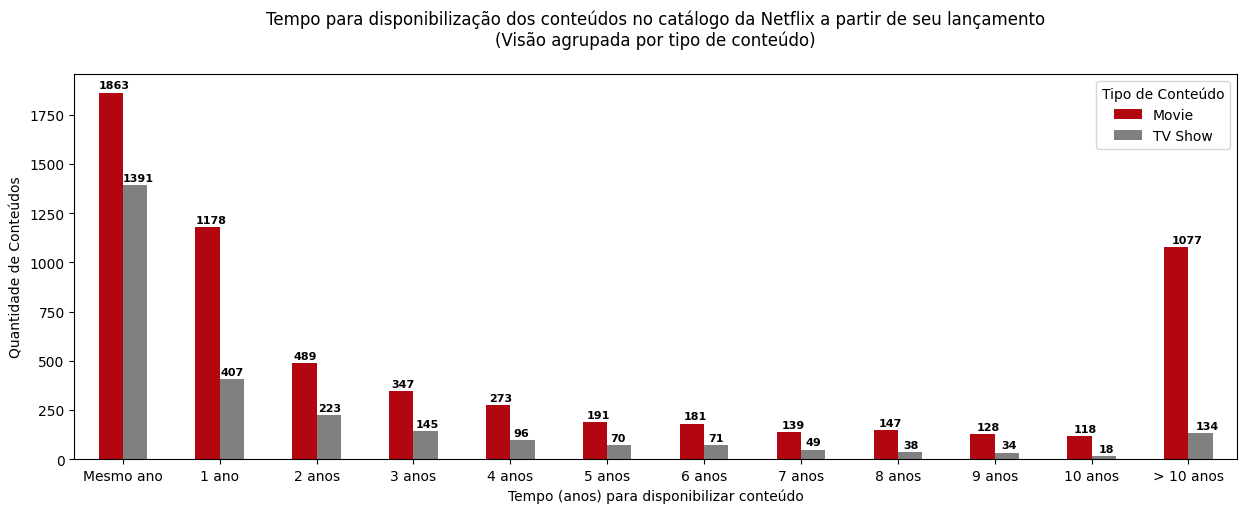

In [ ]:
# Criando uma cópia do dataset netflix
df = netflix.copy()

# Definindo o valor mínimo e máximo (em anos) para agrupamento e exibição dos dados
minimo = 1
maximo = 10

# Gerando a lista de forma dinâmica, para auxiliar a ordenação dos valores de 'release_gap'
ordem = ['Mesmo ano'] + [f'{i} ano' if i == 1 else f'{i} anos' for i in range(minimo, maximo + 1)] + [f'> {maximo} anos']

# Função para definir o nome do grupo, de acordo com o valor de 'release_gap'
def definir_grupo(release_gap):
    if release_gap == 0:
        return 'Mesmo ano'
    elif release_gap == 1:
        return '1 ano'
    elif 2 <= release_gap <= maximo:
        return f'{release_gap} anos'
    else:
        return '> {} anos'.format(maximo)

# Aplicando a função para criar a nova coluna 'release_gap_group'
df['release_gap_group'] = df['release_gap'].apply(definir_grupo)

# Agrupando por 'type' e 'release_gap_group', e contando a quantidade de itens
agrupamento = df.groupby(['type', 'release_gap_group']).size().reset_index(name='quantidade')

# Convertendo 'release_gap_group' para uma categoria com a ordem especificada
agrupamento['release_gap_group'] = pd.Categorical(agrupamento['release_gap_group'], categories=ordem, ordered=True)

# Ordenando o DataFrame por 'type' e 'release_gap_group'
agrupamento = agrupamento.sort_values(by=['type', 'release_gap_group'])

# Criando um gráfico de barras agrupado
pivot = agrupamento.pivot(index='release_gap_group', columns='type', values='quantidade')

# Definindo as cores para cada tipo de conteúdo
cores = {'Movie': '#b20710', 'TV Show': 'gray'}

# Criando o gráfico de barras agrupadas com as cores especificadas
ax = pivot.plot(kind='bar', color=[cores[col] for col in pivot.columns], figsize=(15, 5))

# Adicionando rótulos e título
plt.xlabel('Tempo (anos) para disponibilizar conteúdo')
plt.ylabel('Quantidade de Conteúdos')
plt.title('Tempo para disponibilização dos conteúdos no catálogo da Netflix a partir de seu lançamento\n(Visão agrupada por tipo de conteúdo)\n')

# Rotacionando os rótulos do eixo y em 45 graus
plt.xticks(rotation=0)

# Configurando a legenda
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=1)
plt.legend(title='Tipo de Conteúdo')

# Exibindo os valores acima das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.007, p.get_height() + 20), weight='bold', fontsize=8)

# Exibindo o gráfico
plt.show()


Observando a visão agrupada por tipo de conteúdo, nota-se que a maioria dos filmes e séries são disponibilizados na plataforma no mesmo ano de seu lançamento.

No entanto, ao observar a quantidade de conteúdos disponibilizados com mais de 10 anos após seu lançamento, notamos que existe uma proporção maior de filmes do que séries neste cenário, indicando que a plataforma disponibiliza também filmes mais antigos.

<br><br><br>

## 6.2. Tipo de conteúdo

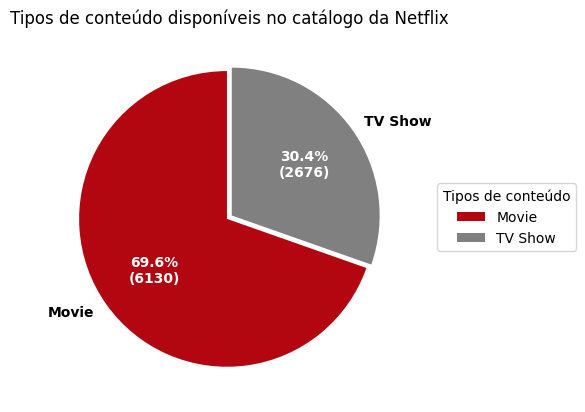

In [ ]:
# Sumarizando os tipos de conteúdo do catálogo e suas quantidades
tipos_conteudo = netflix['type'].value_counts()

# Função personalizada para formatar os rótulos com percentual e quantidade
def label_format(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{pct:.1f}%\n({absolute:d})"

# Definindo o deslocamento para cada fatia do gráfico de pizza
espaco_fatias = [0.02] * len(tipos_conteudo)  # Desloca todas as fatias igualmente (deslocadas 2% do raio, a partir do centro)

# Criando o gráfico de pizza com as fatias descoladas
fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(tipos_conteudo, labels=tipos_conteudo.index, autopct=lambda pct: label_format(pct, tipos_conteudo), startangle=90,
       colors=['#b20710', 'gray'], explode=espaco_fatias, textprops={'color':"black", 'weight':'bold'})

# Alterando a cor dos rótulos para preto
for text in texts:
    text.set_color('black')

# Alterando a cor dos textos dentro das fatias para branco
for autotext in autotexts:
    autotext.set_color('white')

# Incluindo a legenda
ax.legend(tipos_conteudo.index, title="Tipos de conteúdo", loc="center", bbox_to_anchor=(1, 0, 0.5, 1))

# Incluindo o título
plt.title('Tipos de conteúdo disponíveis no catálogo da Netflix')

# Exibindo o gráfico
plt.show()

Analisando os diferentes tipos de conteúdo disponíveis na plataforma, podemos verificar, em geral, o catálogo possui uma quantidade significativamente maior de filmes (70% do conteúdo) do que séries (30%).

<br>

Podemos analisar também a distribuição por país que produziu cada conteúdo:

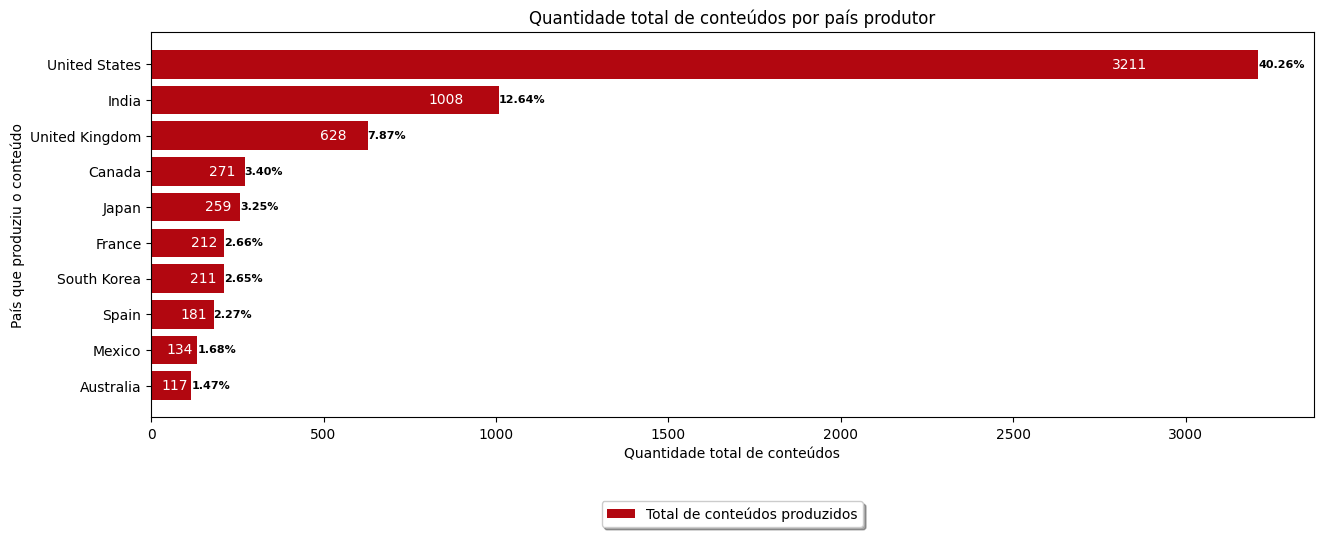

In [ ]:
# Criando um DataFrame agrupado por 'country'
grouped = netflix.groupby('country').size()

# Desconsiderando os registros com país = 'Não informado'
grouped = grouped[grouped.index != 'Não informado']

# Selecionando os 10 principais países com base no total de conteúdo
top_countries = grouped.nlargest(10)

# Calculando o total de registros
total_registros = grouped.sum()

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(15,5))
index = np.arange(len(top_countries))
bars = ax.barh(index, top_countries, color='#b20710')

# Adicionando os valores totais nas barras
for i in range(len(top_countries)):
    percentual = (top_countries[i] / total_registros) * 100
    ax.text(top_countries[i] * 0.9, i, f"{top_countries[i]}", va='center', ha='right', color='white', fontsize=10)
    ax.text(top_countries[i], i, f"{percentual:.2f}%", va='center', ha='left', color='black', fontsize=8, fontweight='bold')
   #ax.text(top_countries[i]*0.9, i, f"{top_countries[i]}", va='center', ha='right', color='white', fontsize=10, fontweight='bold')

# Posicionando a legenda na parte inferior central da área
ax.legend(['Total de conteúdos produzidos'], loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True)

# Adicione rótulos, título e eixos personalizados
ax.set_xlabel('Quantidade total de conteúdos')
ax.set_ylabel('País que produziu o conteúdo')
ax.set_title('Quantidade total de conteúdos por país produtor')
ax.set_yticks(index)
ax.set_yticklabels(top_countries.index)

ax.invert_yaxis()

# Exiba o gráfico
plt.show()

Como previsto nas hipóteses (já que a plataforma é americana e este representa o maior mercado cinematográfico), a maioria do conteúdo disponível no catálogo foi produzido nos Estados Unidos. India e Reino Unido aparecem logo em seguida.

<br>

Analisando agora a proporção do tipo de conteúdo por cada país que o produziu. Como já identificamos que a maior parte do conteúdo da plataforma é de filmes, a visão a seguir irá mostrar os países que produzem uma proporção maior de filmes em relação às séries:

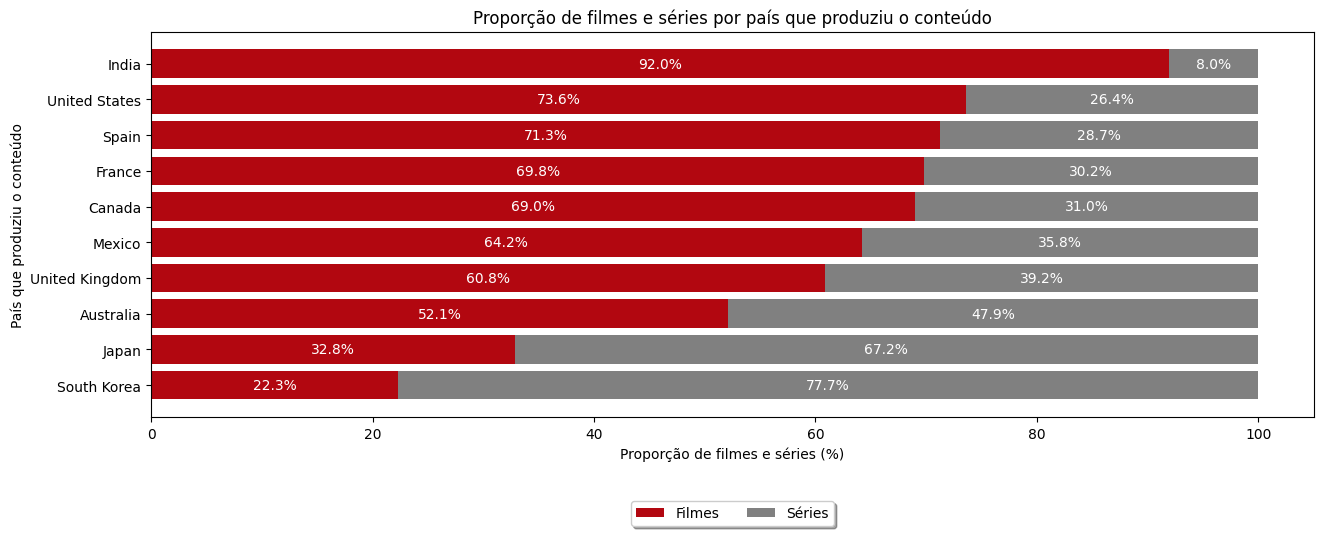

In [ ]:
# Criando um DataFrame agrupado por 'country' e 'type'
grouped = netflix.groupby(['country', 'type']).size().unstack()

# Desconsiderando os registros com país = 'Não informado'
grouped = grouped[grouped.index != 'Não informado']

# Calculando a proporção de filmes e séries para cada país
grouped['total'] = grouped.sum(axis=1)
grouped['movie_ratio'] = grouped['Movie'] / grouped['total'] * 100
grouped['series_ratio'] = grouped['TV Show'] / grouped['total'] * 100

# Selecionando os 10 principais países com base no total de filmes e séries
top_countries = grouped.nlargest(10, 'total')

# Ordenando o dataframe em ordem decrescente
top_countries = top_countries.sort_values('movie_ratio', ascending=False)

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize = (15,5))
index = np.arange(len(top_countries))
bar1 = ax.barh(index, top_countries['movie_ratio'], color='#b20710', label='Filmes')
bar2 = ax.barh(index, top_countries['series_ratio'], left=top_countries['movie_ratio'], color='gray', label='Séries')

# Adicionando os valores (percentuais) nas barras
for i in range(len(top_countries)):
    ax.text(top_countries['movie_ratio'][i] / 2, i, f"{top_countries['movie_ratio'][i]:.1f}%", va='center', ha='center', color='white', fontsize=10)
    ax.text(top_countries['movie_ratio'][i] + top_countries['series_ratio'][i] / 2, i, f"{top_countries['series_ratio'][i]:.1f}%", va='center', ha='center', color='white', fontsize=10)

# Posicionando a legenda na parte inferior central da área
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)

# Adicione rótulos, título e eixos personalizados
ax.set_xlabel('Proporção de filmes e séries (%)')
ax.set_ylabel('País que produziu o conteúdo')
ax.set_title('Proporção de filmes e séries por país que produziu o conteúdo')
ax.set_yticks(index)
ax.set_yticklabels(top_countries.index)

ax.invert_yaxis()

# Exiba o gráfico
plt.show()

A proporção entre produção de filmes e séries varia significativamente entre diferentes países. Os conteúdos produzidos na India, Egito ou Estados Unidos, por exemplo, são em sua grande maioria filmes. Já na Coreia do Sul ou Japão, a maioria dos conteúdos produzidos são séries.

O fato da India estar em primeiro lugar na lista significa que é o país que tem a maior proporção de filmes em comparação às séries que produz. Não indica que é o país que mais produz conteúdos em geral, pois como já vimos anteriormente, é os Estados Unidos.

<br><br><br>

## 6.3. Quantidade de conteúdos disponibilizados ao longo do tempo



Vamos analisar a evolução na quantidade de conteúdos adicionados na plataforma ano a ano:

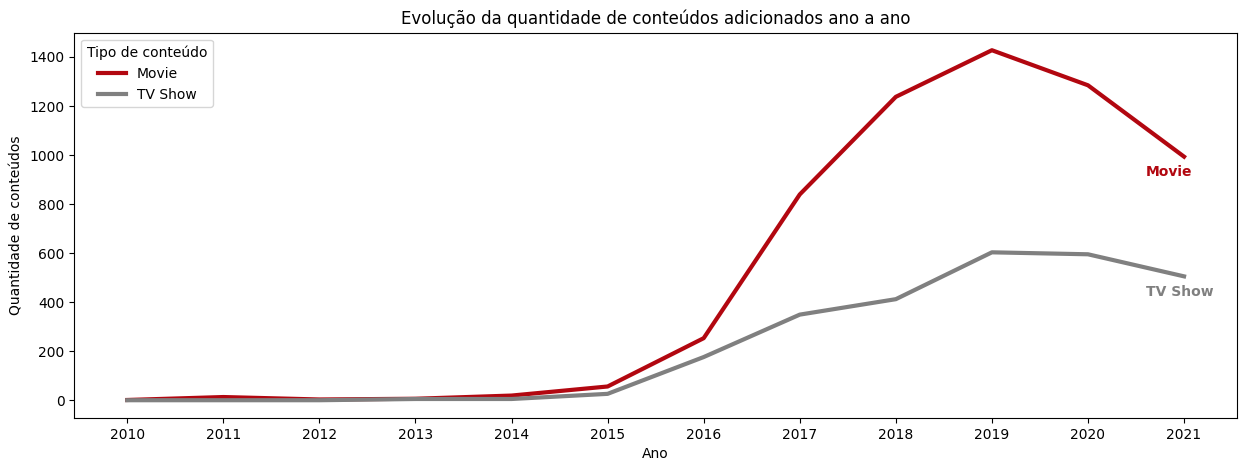

In [ ]:
# Agrupando os dados por ano e tipo de conteúdo e contando as ocorrências
conteudos_por_ano = netflix.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Definindo as cores para cada tipo de conteúdo
cores = {'Movie': '#b20710', 'TV Show': 'gray'}

# Criando o gráfico de linhas
fig, ax = plt.subplots(figsize = (15,5))
for tipo in conteudos_por_ano.columns:
    ax.plot(conteudos_por_ano.index, conteudos_por_ano[tipo], label=tipo, color=cores[tipo], linewidth=3)

# Definindo os valores do eixo X
ax.set_xticks(ticks = conteudos_por_ano.index, labels = conteudos_por_ano.index)

# Incluindo os nomes das séries ao final de cada linha do gráfico
handles = ax.get_legend_handles_labels()
for i in range(len(handles[0])):
  maxx = max(handles[0][i].get_xdata()) # posicao X correspondente ao valor do último item da linha
  maxy = handles[0][i].get_ydata()[-1]  # posicao Y correspondente ao valor do último item da linha
  label = handles[1][i]                 # rótulo da linha (parâmetro label no Axes.plot)
  ax.annotate(text = label, xy = (maxx-0.4, maxy-80), color = handles[0][i].get_color(), size = 10, fontweight = 'bold')

# Adicionando título e rótulos aos eixos
ax.set_title('Evolução da quantidade de conteúdos adicionados ano a ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de conteúdos')
plt.legend(title='Tipo de conteúdo')

# Exibindo o gráfico
plt.show()

Nota-se um aumento significativo na quantidade de filmes disponibilizados na plataforma anualmente, entre 2016 e 2019. Neste mesmo período, também houve um aumento na quantidade de séries disponibilizadas, porém em uma escala bem menor que a dos filmes.

Isso indica que a Netflix deu um foco maior em disponibilizar mais filmes em seu catálogo.

<br><br>

Analisando agora a visão acumulada ao longo dos anos:

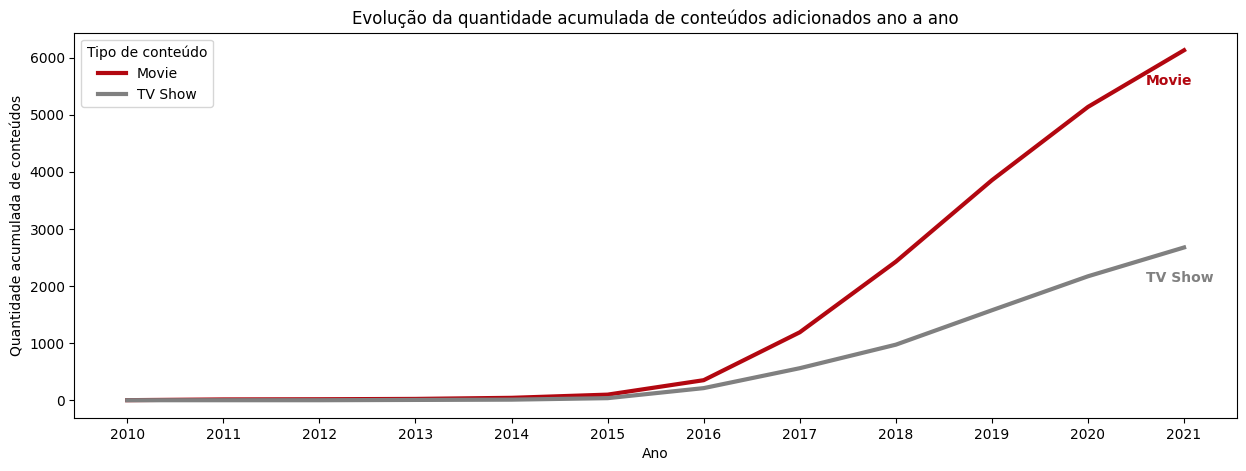

In [ ]:
# Agrupando os dados por ano e tipo de conteúdo e contando as ocorrências
conteudos_por_ano = netflix.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Calculando a soma acumulada dos conteúdos por ano
conteudos_acumulados = conteudos_por_ano.cumsum()

# Definindo as cores para cada tipo de conteúdo
cores = {'Movie': '#b20710', 'TV Show': 'gray'}

# Criando o gráfico de linhas
fig, ax = plt.subplots(figsize = (15,5))
for tipo in conteudos_acumulados.columns:
    ax.plot(conteudos_acumulados.index, conteudos_acumulados[tipo], label=tipo, color=cores[tipo], linewidth=3)

# Define os valores do eixo X
ax.set_xticks(ticks = conteudos_acumulados.index, labels = conteudos_acumulados.index)

# Incluindo os nomes das séries ao final de cada linha do gráfico
handles = ax.get_legend_handles_labels()
for i in range(len(handles[0])):
  maxx = max(handles[0][i].get_xdata()) # posicao X correspondente ao valor do último item da linha
  maxy = handles[0][i].get_ydata()[-1]  # posicao Y correspondente ao valor do último item da linha
  label = handles[1][i]                 # rótulo da linha (parâmetro label no Axes.plot)
  ax.annotate(text = label, xy = (maxx-0.4, maxy-600), color = handles[0][i].get_color(), size = 10, fontweight = 'bold')

# Adicionando título e rótulos aos eixos
ax.set_title('Evolução da quantidade acumulada de conteúdos adicionados ano a ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade acumulada de conteúdos')
plt.legend(title='Tipo de conteúdo')

# Exibindo o gráfico
plt.show()

Nesta visão acumulada é possível notar que o catálogo de filmes cresce em uma taxa maior do que a de séries. Isso é justificado com a visão do gráfico anterior (ano a ano), onde é possível identificar um aumento significativo na quantidade de filmes disponibilizados entre 2016 e 2019.

## 6.4. Classificação etária

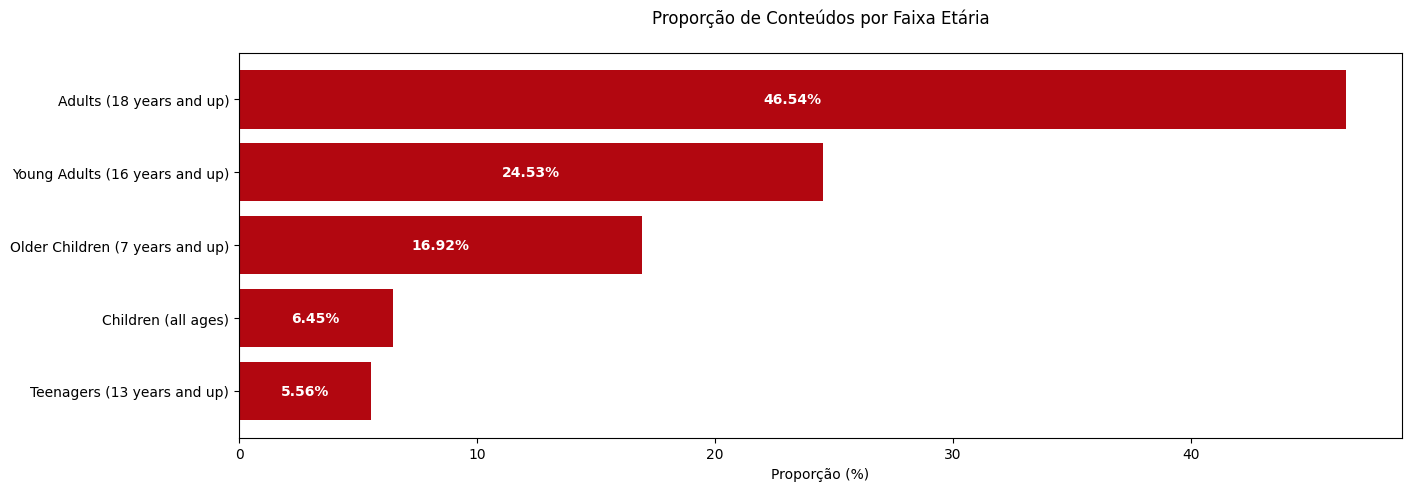

In [ ]:
# Calculando a contagem de conteúdos por faixa etária
conteudos_por_faixa_etaria = netflix['target_ages'].value_counts()

# Calculando a proporção de conteúdos por faixa etária
total_conteudos = conteudos_por_faixa_etaria.sum()
proporcao_conteudos = (conteudos_por_faixa_etaria / total_conteudos) * 100

# Criando o gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(15,5))
barras = ax.barh(proporcao_conteudos.index, proporcao_conteudos, color='#b20710')
plt.xlabel('Proporção (%)')
plt.title('Proporção de Conteúdos por Faixa Etária\n')

# Adicionando rótulos com as porcentagens em cada barra
for barra in barras:
    plt.text(
        barra.get_width() / 2,  # Posição X, no centro da barra
        barra.get_y() + barra.get_height() / 2,  # Posição Y, no centro da barra
        f'{barra.get_width():.2f}%',  # Texto do rótulo
        ha='center',  # Alinhamento horizontal
        va='center',  # Alinhamento vertical
        color='white',  # Cor do texto
        fontweight='bold'  # Negrito
    )

# Invertendo a ordenação padrão, para que exiba os valores com maior percentual primeiro
ax.invert_yaxis()

# Mostrando o gráfico
plt.show()

Ao analisar a classificação etária dos conteúdos da plataforma, verificamos que a maior parte dos conteúdos é direcionada a adultos e jovens adultos (16 anos ou mais). Apesar de possuir uma proporção razoável de conteúdos para crianças maiores do que 7 anos, nota-se que o foco principal da plataforma não é conteúdo infantil.

Podemos também analisar se esta proporção se mantém nos diferentes países produtores de conteúdo:

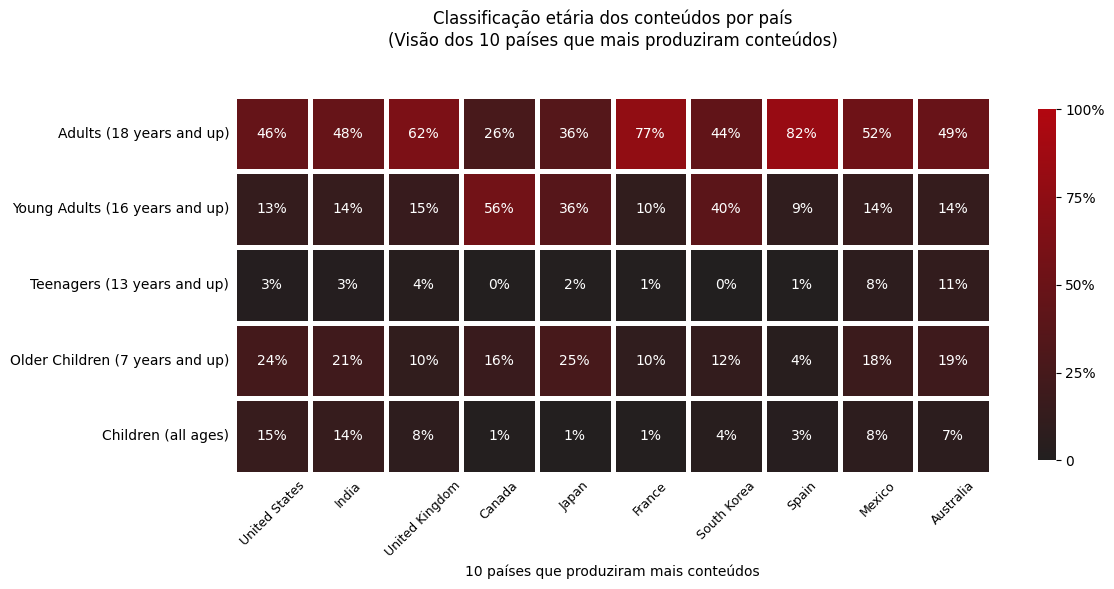

In [ ]:
# Definindo cores baseadas na paleta do Netflix
cmap = mcolors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

# Calculando a contagem total de conteúdos por país, excluindo 'Não informado'
conteudos_por_pais = netflix[netflix['country'] != 'Não informado']['country'].value_counts()

# Selecionando os 10 países com mais conteúdos
top_paises = conteudos_por_pais.head(10).index.tolist()

# Definindo a ordenação desejada para 'target_ages'
ordem_classificacoes = ['Adults (18 years and up)', 'Young Adults (16 years and up)', 'Teenagers (13 years and up)', 'Older Children (7 years and up)','Children (all ages)']

# Criando um dataframe de contagem de conteúdos por 'target_ages' e 'country'
count_heatmap = netflix[netflix['country'].isin(top_paises)].groupby(['target_ages', 'country']).size().unstack(fill_value=0)

# Calculando o total de conteúdos por país
total_conteudos_por_pais = netflix['country'].value_counts().loc[top_paises]

# Calculando o percentual de conteúdos para cada célula do heatmap
percent_heatmap = count_heatmap.div(total_conteudos_por_pais, axis=1)

# Reordenando o dataframe de acordo com a ordenação definida em 'ordem_classificacoes'
percent_heatmap = percent_heatmap.reindex(ordem_classificacoes)

# Ajustando o código do heatmap para exibir os percentuais
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
cbar_ax = sns.heatmap(percent_heatmap, cmap=cmap, square=True, linewidth=2.5, annot=True, fmt='1.0%', vmax=1, vmin=0, cbar_kws={"shrink": 0.3,}).collections[0].colorbar

# Ajustando a escala de cores da legenda, para exibir valores em percentual
cbar_ax.set_ticks([0, .25, .5, .75, 1])
cbar_ax.set_ticklabels(['0', '25%', '50%', '75%', '100%'])

# Ajustando as etiquetas dos eixos
ax.set_yticklabels(ordem_classificacoes, rotation=0, fontsize=10)
ax.set_xticklabels(top_paises, rotation=45, fontsize=9)

ax.set_title('Classificação etária dos conteúdos por país\n(Visão dos 10 países que mais produziram conteúdos)\n\n')
ax.set_xlabel('10 países que produziram mais conteúdos')
ax.set_ylabel('')

ax.tick_params(axis=u'both', which=u'both', length=0)
plt.tight_layout()
plt.show()

A grande maioria dos países também produzem conteúdo mais focado no público adulto. As exeções ficam com Canadá, onde a maioria dos conteúdos foi produzida para pessoas a partir de 16 anos; e Japão, onde as proporções entre conteúdos focados para adultos e para jovens adultos (16 anos ou mais) é a mesma.

Estados Unidos e India são os países que mais produzem conteúdo para o público infantil (crianças em geral, ou crianças entre 7 e 12 anos).

## 6.5. Títulos

Podemos analisar as palavras mais comuns nos títulos dos conteúdos, exibindo uma nuvem de palavras (word cloud):

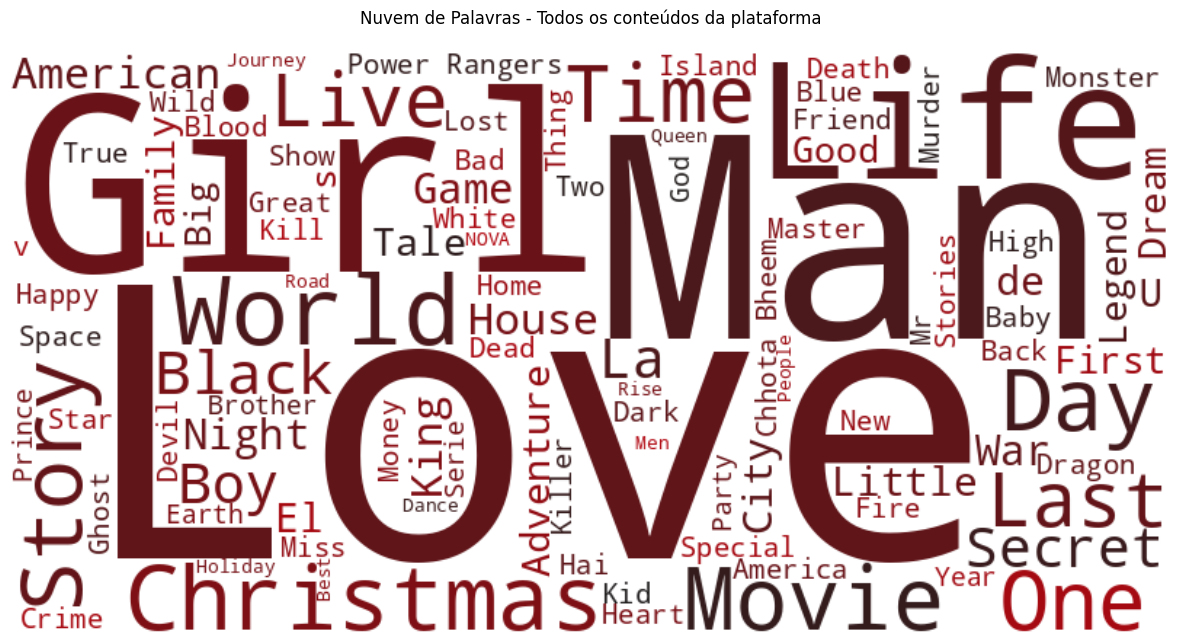

In [ ]:
# Concatenando todos os títulos em uma única string
text = ' '.join(titulo for titulo in netflix['title'])

# Definindo cores baseadas na paleta do Netflix
cmap = mcolors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

# Criando a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=cmap, max_words = 100).generate(text)

# Exibindo a nuvem de palavras gerada
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')  # Remove os eixos do gráfico

# Definindo o título do gráfico
plt.title('Nuvem de Palavras - Todos os conteúdos da plataforma\n')

plt.show()

Dentre as palavras mais comuns entre todos os títulos do catálogo, "Love" é a palavra que mais se destaca, indicando uma popularidade entre títulos que falam sobre amor.

Podemos identificar também outras palavras que destacam como "Man", "Girl", "World", "Life" e "Christmas".

Curiosamente, a palavra "Man" aparece mais vezes que que "Girl".

<br>

Vamos em seguida analisar as palavras dividindo os conteúdos entre Filmes e Séries, para verificar se há alguma mudança de padrão:

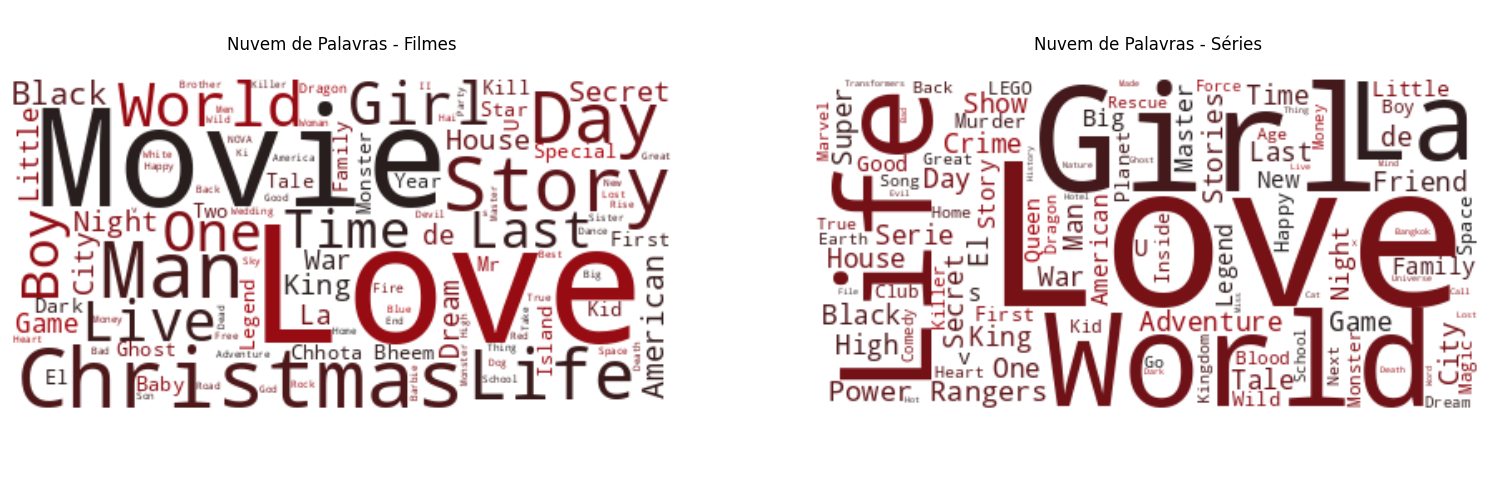

In [ ]:
# Criando nuvens de palavras separadas para cada tipo de conteúdo
text_movies = ' '.join(netflix[netflix['type'] == 'Movie']['title'])
wordcloud_movies = WordCloud(width=400, height=200, background_color='white', colormap=cmap, max_words = 100).generate(text_movies)

text_tvshows = ' '.join(netflix[netflix['type'] == 'TV Show']['title'])
wordcloud_tvshows = WordCloud(width=400, height=200, background_color='white', colormap=cmap, max_words = 100).generate(text_tvshows)


# Definindo cores baseadas na paleta do Netflix
cmap = mcolors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

# Criando a figura e os subplots com larguras relativas
fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [6, 1, 6]})

# Nuvem de palavras para filmes
axs[0].imshow(wordcloud_movies, interpolation='bilinear')
axs[0].set_title('Nuvem de Palavras - Filmes\n')
axs[0].axis('off')

axs[1].axis('off')

# Nuvem de palavras para séries
axs[2].imshow(wordcloud_tvshows, interpolation='bilinear')
axs[2].set_title('Nuvem de Palavras - Séries\n')
axs[2].axis('off')

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

A palavra "Love" continua em destaque em ambos os grupos.

Nos filmes, podemos identificar a palavra "Movie" em destaque, enquanto as demais palavras se "misturam", com frequências similares.

Nas séries, "World", "Girl" e "Life" se destacam dentre as mais frequentes.

## 6.6. Gêneros

Para analisar os gêneros de cada conteúdo, podemos utilizar os valores do atributo **listed_in**:

In [ ]:
# Exibindo uma amostra dos dados
netflix.head(3)[['show_id', 'type','title','listed_in']]

,show_id,type,title,listed_in
0,s1,Movie,Dick Johnson Is Dead,Documentaries
1,s2,TV Show,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,"Crime TV Shows, International TV Shows, TV Act..."


Observando esta amostra, é possível identificar que este atributo contém um ou vários gêneros listados. Será necessário extrair todos para obter uma visão completa:

In [ ]:
# Função para contar os gêneros com valores separados por vírgula
def contar_generos(dataframe, coluna):
    # Dividindo os gêneros e expandindo em uma lista
    generos_lista = dataframe[coluna].str.split(', ').sum()
    # Contando a ocorrência de cada gênero
    contagem_generos = Counter(generos_lista)
    return contagem_generos

# Aplicando a função na coluna 'listed_in', para criar contagens de gêneros de Filmes e Séries em dataframes separados
contagem_filmes = contar_generos(netflix[netflix['type'] == 'Movie'], 'listed_in')
contagem_series = contar_generos(netflix[netflix['type'] == 'TV Show'], 'listed_in')

# Convertendo a contagem em series, para criacao dos gráficos
generos_filmes = pd.Series(contagem_filmes)
generos_series = pd.Series(contagem_series)

Em seguida, podemos utilizar os dois conjuntos criados **generos_filmes** e **generos_series** para analisar os gêneros mais comuns em cada tipo de conteúdo do catálogo:

In [ ]:
# Como a montagem dos gráficos para ambos os dataframes será a mesma, será criada uma função
# para ser utilizada nos dois casos

def cria_grafico_genero(lista, nome):

  # Ordenando a série para serem exibidas da maior para a menor quantidade
  lista = lista.sort_values(ascending=True)

  # Criando o gráfico de barras horizontal
  fig, ax = plt.subplots(figsize=(15,5))
  barras = ax.barh(lista.index, lista, color='#b20710')
  plt.xlabel('Quantidade de {}'.format(nome))
  plt.title('Quantidade de {} por Gênero\n'.format(nome))

  # Adicionando rótulos com as porcentagens em cada barra
  for barra in barras:
      plt.text(
          barra.get_width() / 2,  # Posição X, no centro da barra
          barra.get_y() + barra.get_height() / 2,  # Posição Y, no centro da barra
          f'{barra.get_width()}',  # Texto do rótulo
          ha='center',  # Alinhamento horizontal
          va='center',  # Alinhamento vertical
          color='white',  # Cor do texto
          fontweight='bold',  # Negrito
          fontsize=8
      )

  # Mostrando o gráfico
  plt.show()

  return None

Analisando os gêneros mais comuns nos filmes do catálogo:

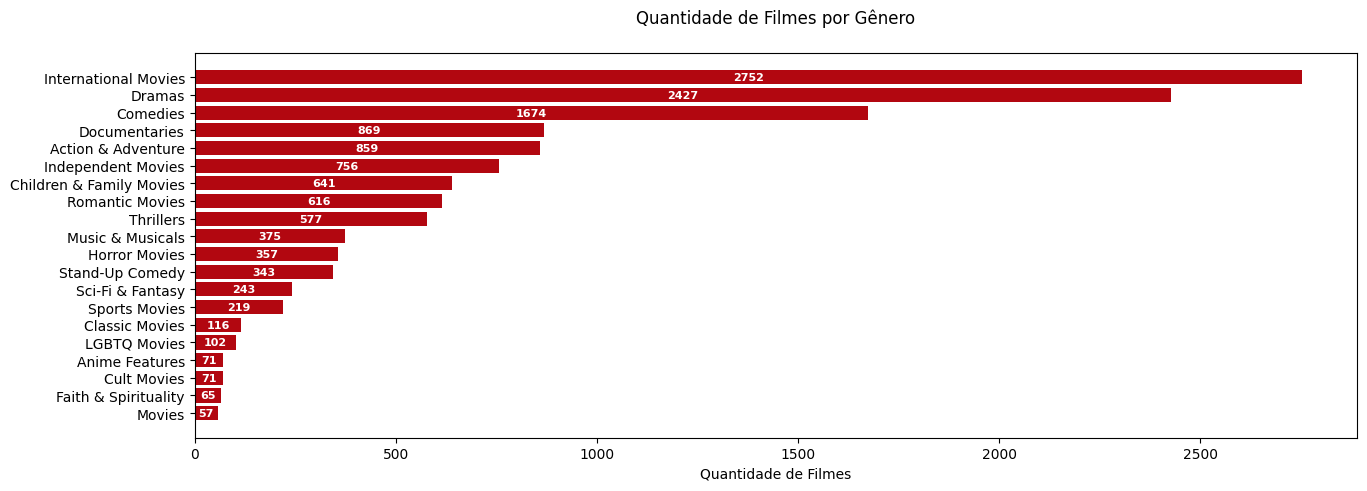

In [ ]:
cria_grafico_genero(generos_filmes, 'Filmes')

O gênero mais comum entre os filmes é **International Movies**, seguidos de **Dramas** e **Comedies**.

Os gêneros menos comuns são **Cult Movies**, **Faith & Spirituality** e **Movies**.

Analisando os gêneros mais comuns nas séries do catálogo:

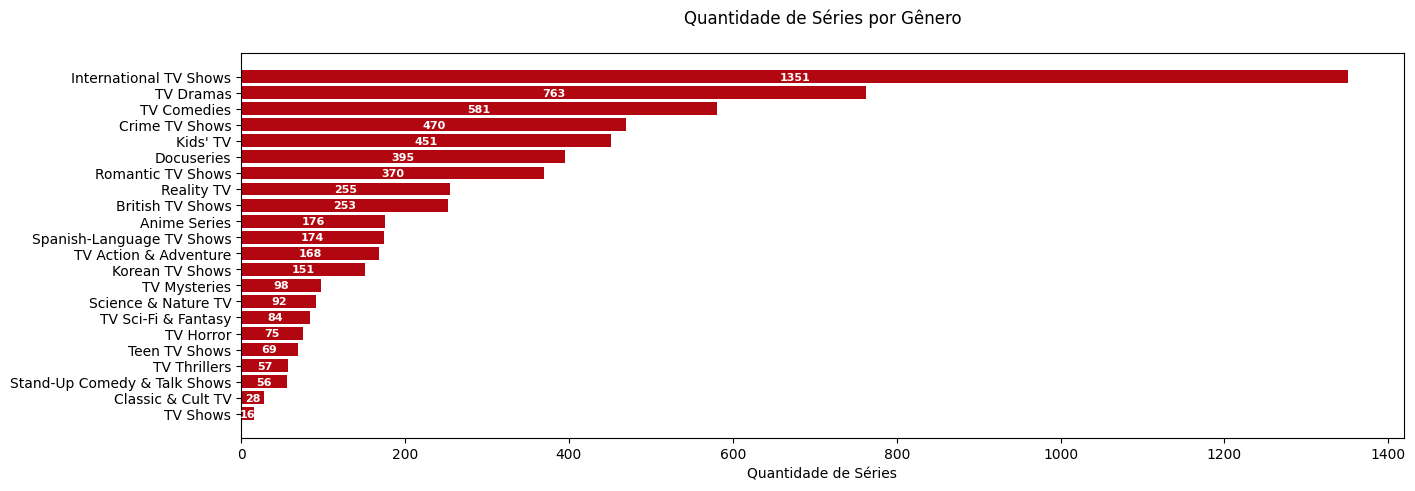

In [ ]:
cria_grafico_genero(generos_series, 'Séries')

Como principais gêneros para as séries constam **International TV Shows**, **TV Dramas** e **TV Comedies**, que também correspondem aos 3 gêneros mais populares entre os filmes.

Os gêneros menos comuns para as séries do catálogo são **Stand-up Comedy & Talk Shows**, **Classic & Cult TV** e **TV Shows**.

<br><br><br>



# 7. Conclusão

A análise exploratória realizada no catálogo da Netflix permitiu identificar informações relevantes sobre seu conteúdo, que podem ser úteis para auxiliar a tomada de decisão de um possível novo assinante, tendo em vista que a plataforma não divulga todas as informações identificadas de maneira fácil ao público. Utilizando recursos para carga e transformação de dados, assim como estatísticas descritivas e visualizações de dados, foi possível validar e responder a todas as hipóteses e questões levantadas na sessão de Contexto deste estudo.

Pode-se considerar que o problema proposto pode ser resolvido com o escopo desenvolvido neste projeto, já que uma série de informações detalhadas sobre o catálogo puderam ser avaliadas.

Em trabalhos futuros, novos tipos de visualização podem ser adicionados à etapa de análise, além de considerar correlações adicionais entre os atributos visando complementar as informações já geradas.